In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from sklearn.preprocessing import  StandardScaler,RobustScaler,MinMaxScaler
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix,classification_report,ConfusionMatrixDisplay
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
import category_encoders as ce

In [2]:
employees = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [3]:
eda_employee = employees.copy()

In [4]:
pd.set_option('display.max_columns', None)
eda_employee.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [5]:
print(f"shape of the data: {eda_employee.shape}")

shape of the data: (1470, 35)


In [6]:
eda_employee.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [7]:
eda_employee.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [8]:
eda_employee.PercentSalaryHike = eda_employee.PercentSalaryHike / 100

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'DailyRate'}>,
        <Axes: title={'center': 'DistanceFromHome'}>,
        <Axes: title={'center': 'Education'}>,
        <Axes: title={'center': 'EmployeeCount'}>],
       [<Axes: title={'center': 'EmployeeNumber'}>,
        <Axes: title={'center': 'EnvironmentSatisfaction'}>,
        <Axes: title={'center': 'HourlyRate'}>,
        <Axes: title={'center': 'JobInvolvement'}>,
        <Axes: title={'center': 'JobLevel'}>],
       [<Axes: title={'center': 'JobSatisfaction'}>,
        <Axes: title={'center': 'MonthlyIncome'}>,
        <Axes: title={'center': 'MonthlyRate'}>,
        <Axes: title={'center': 'NumCompaniesWorked'}>,
        <Axes: title={'center': 'PercentSalaryHike'}>],
       [<Axes: title={'center': 'PerformanceRating'}>,
        <Axes: title={'center': 'RelationshipSatisfaction'}>,
        <Axes: title={'center': 'StandardHours'}>,
        <Axes: title={'center': 'StockOptionLevel'}>,
        <Axe

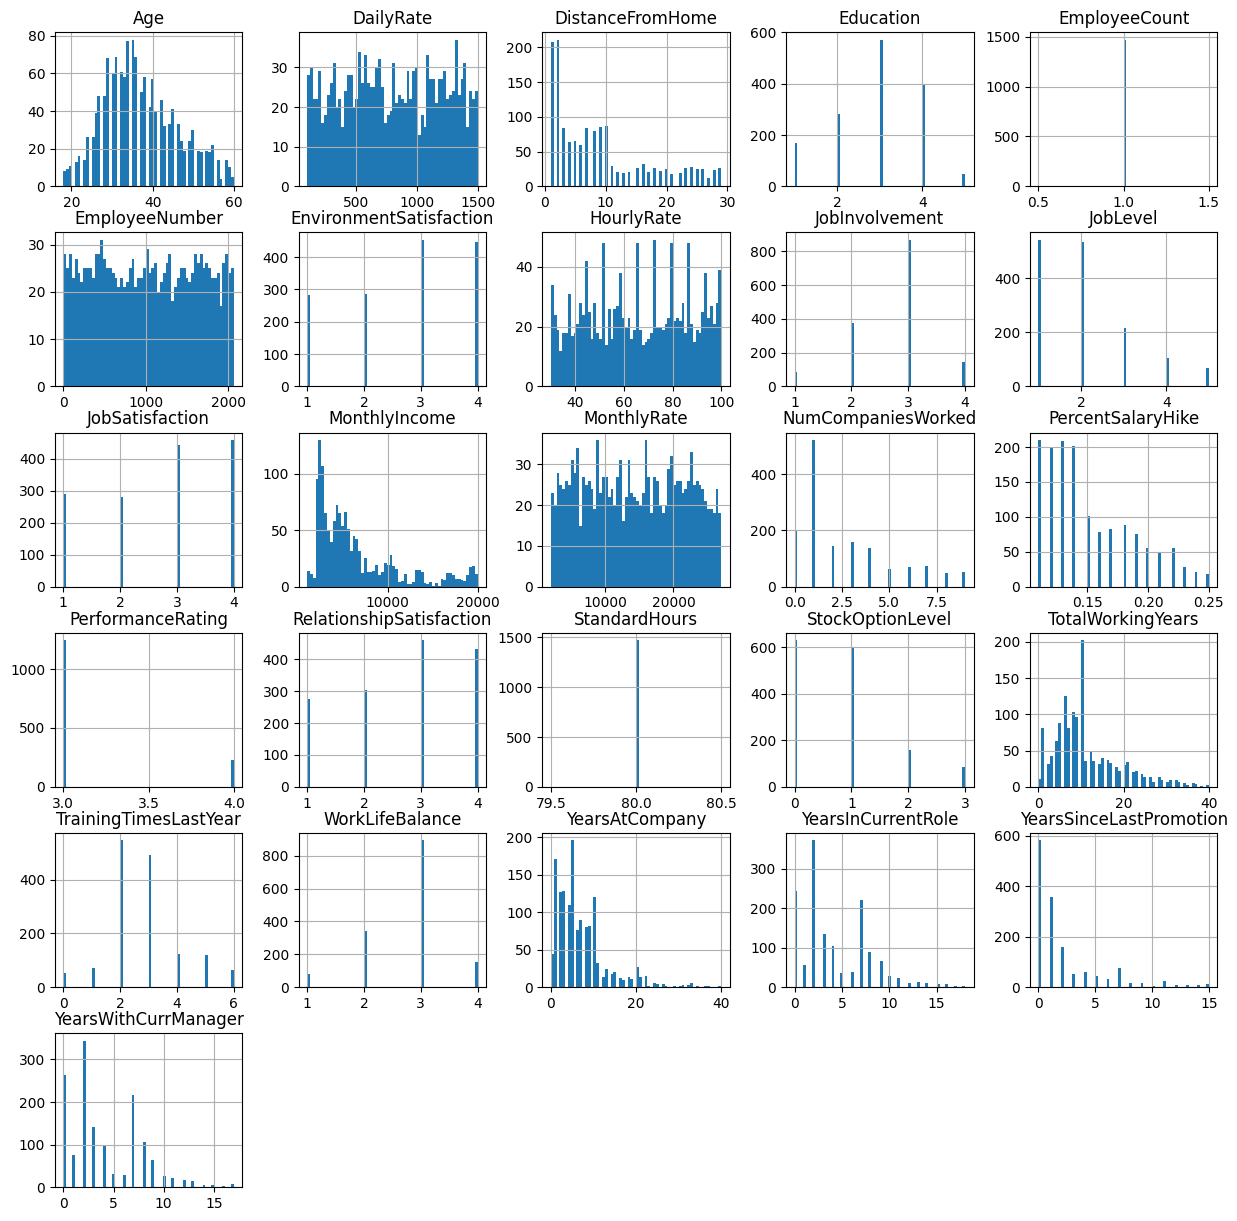

In [9]:
#  plot the distribution for all the numerical features.
eda_employee.hist(bins=60,figsize=(15,15))

In [10]:
numeric_col = [col for col in eda_employee.columns if eda_employee[col].dtype != "object"]
categorical_col = [col for col in eda_employee.columns if eda_employee[col].dtype == 'object']

In [11]:
def calculate_outliers(eda_employee):
    outlier_flags = pd.DataFrame(False, index=eda_employee.index, columns=eda_employee.columns)
    for column in eda_employee.select_dtypes(include=['float64', 'int64']).columns:
        Q1 = eda_employee[column].quantile(0.25)
        Q3 = eda_employee[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outlier_flags[column] = (eda_employee[column] < lower_bound) | (eda_employee[column] > upper_bound)
        num_outliers = outlier_flags[column].sum()
        percentage_outliers = (num_outliers / eda_employee.shape[0]) * 100
        print(f"Feature '{column}': {num_outliers} outliers ({percentage_outliers:.2f}%)")
    rows_with_outliers = outlier_flags.any(axis=1).sum()
    percentage_rows_with_outliers = (rows_with_outliers / eda_employee.shape[0]) * 100
    print(f"\nTotal rows with outliers: {rows_with_outliers} ({percentage_rows_with_outliers:.2f}%)")
    return outlier_flags

 #Call the function
outlier_flags = calculate_outliers(eda_employee)

Feature 'Age': 0 outliers (0.00%)
Feature 'DailyRate': 0 outliers (0.00%)
Feature 'DistanceFromHome': 0 outliers (0.00%)
Feature 'Education': 0 outliers (0.00%)
Feature 'EmployeeCount': 0 outliers (0.00%)
Feature 'EmployeeNumber': 0 outliers (0.00%)
Feature 'EnvironmentSatisfaction': 0 outliers (0.00%)
Feature 'HourlyRate': 0 outliers (0.00%)
Feature 'JobInvolvement': 0 outliers (0.00%)
Feature 'JobLevel': 0 outliers (0.00%)
Feature 'JobSatisfaction': 0 outliers (0.00%)
Feature 'MonthlyIncome': 114 outliers (7.76%)
Feature 'MonthlyRate': 0 outliers (0.00%)
Feature 'NumCompaniesWorked': 52 outliers (3.54%)
Feature 'PercentSalaryHike': 0 outliers (0.00%)
Feature 'PerformanceRating': 226 outliers (15.37%)
Feature 'RelationshipSatisfaction': 0 outliers (0.00%)
Feature 'StandardHours': 0 outliers (0.00%)
Feature 'StockOptionLevel': 85 outliers (5.78%)
Feature 'TotalWorkingYears': 63 outliers (4.29%)
Feature 'TrainingTimesLastYear': 238 outliers (16.19%)
Feature 'WorkLifeBalance': 0 outliers

### Age

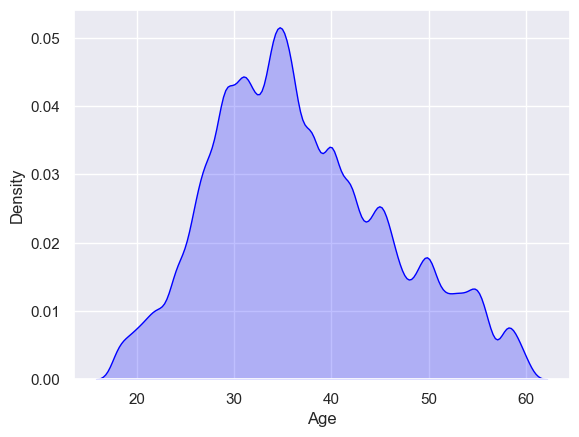

In [12]:
sns.set_theme(style="darkgrid")
sns.kdeplot(eda_employee['Age'], fill=True, color='blue', bw_method=0.08)
plt.show()

In [13]:
eda_employee['Age'].describe()

count    1470.000000
mean       36.923810
std         9.135373
min        18.000000
25%        30.000000
50%        36.000000
75%        43.000000
max        60.000000
Name: Age, dtype: float64

In [14]:
bins = [18, 31, 44, 61]  
labels = ['18-30', '31-43', '44-60']
eda_employee['AgeGroup'] = pd.cut(eda_employee['Age'], bins=bins, labels=labels, right=False)


#### Total Working Years

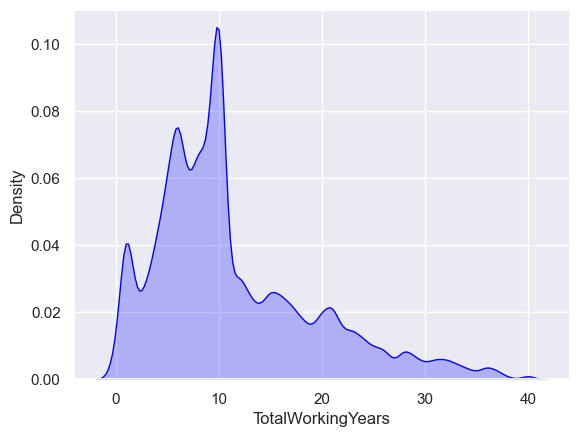

In [15]:
sns.set_theme(style="darkgrid")
sns.kdeplot(eda_employee['TotalWorkingYears'], fill=True, color='blue', bw_method=0.08)
plt.show()

In [16]:
eda_employee['TotalWorkingYears'].describe()

count    1470.000000
mean       11.279592
std         7.780782
min         0.000000
25%         6.000000
50%        10.000000
75%        15.000000
max        40.000000
Name: TotalWorkingYears, dtype: float64

In [17]:
bins = [0, 6, 15, eda_employee['TotalWorkingYears'].max()]  # Define bins based on provided statistics
labels = ['Entry Level', 'Mid Level', 'Senior']
eda_employee['ExperienceLevel'] = pd.cut(eda_employee['TotalWorkingYears'], bins=bins, labels=labels, right=False)
eda_employee=eda_employee.drop(["TotalWorkingYears"],axis=1)

In [18]:
# Define the mapping dictionaries
education_map = {
    1: 'Below College',
    2: 'College',
    3: 'Bachelor',
    4: 'Master',
    5: 'Doctor'
}

environment_satisfaction_map = {
    1: 'Low',
    2: 'Medium',
    3: 'High',
    4: 'Very High'
}

job_involvement_map = {
    1: 'Low',
    2: 'Medium',
    3: 'High',
    4: 'Very High'
}

job_satisfaction_map = {
    1: 'Low',
    2: 'Medium',
    3: 'High',
    4: 'Very High'
}

performance_rating_map = {
    1: 'Low',
    2: 'Good',
    3: 'Excellent',
    4: 'Outstanding'
}

relationship_satisfaction_map = {
    1: 'Low',
    2: 'Medium',
    3: 'High',
    4: 'Very High'
}

work_life_balance_map = {
    1: 'Bad',
    2: 'Good',
    3: 'Better',
    4: 'Best'
}

# Apply the mappings to the respective columns
eda_employee['Education'] = eda_employee['Education'].replace(education_map)
eda_employee['EnvironmentSatisfaction'] = eda_employee['EnvironmentSatisfaction'].replace(environment_satisfaction_map)
eda_employee['JobInvolvement'] = eda_employee['JobInvolvement'].replace(job_involvement_map)
eda_employee['JobSatisfaction'] = eda_employee['JobSatisfaction'].replace(job_satisfaction_map)
eda_employee['PerformanceRating'] = eda_employee['PerformanceRating'].replace(performance_rating_map)
eda_employee['RelationshipSatisfaction'] = eda_employee['RelationshipSatisfaction'].replace(relationship_satisfaction_map)
eda_employee['WorkLifeBalance'] = eda_employee['WorkLifeBalance'].replace(work_life_balance_map)

In [19]:
eda_employee.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,AgeGroup,ExperienceLevel
0,41,Yes,Travel_Rarely,1102,Sales,1,College,Life Sciences,1,1,Medium,Female,94,High,2,Sales Executive,Very High,Single,5993,19479,8,Y,Yes,0.11,Excellent,Low,80,0,0,Bad,6,4,0,5,31-43,Mid Level
1,49,No,Travel_Frequently,279,Research & Development,8,Below College,Life Sciences,1,2,High,Male,61,Medium,2,Research Scientist,Medium,Married,5130,24907,1,Y,No,0.23,Outstanding,Very High,80,1,3,Better,10,7,1,7,44-60,Mid Level
2,37,Yes,Travel_Rarely,1373,Research & Development,2,College,Other,1,4,Very High,Male,92,Medium,1,Laboratory Technician,High,Single,2090,2396,6,Y,Yes,0.15,Excellent,Medium,80,0,3,Better,0,0,0,0,31-43,Mid Level
3,33,No,Travel_Frequently,1392,Research & Development,3,Master,Life Sciences,1,5,Very High,Female,56,High,1,Research Scientist,High,Married,2909,23159,1,Y,Yes,0.11,Excellent,High,80,0,3,Better,8,7,3,0,31-43,Mid Level
4,27,No,Travel_Rarely,591,Research & Development,2,Below College,Medical,1,7,Low,Male,40,High,1,Laboratory Technician,Medium,Married,3468,16632,9,Y,No,0.12,Excellent,Very High,80,1,3,Better,2,2,2,2,18-30,Mid Level


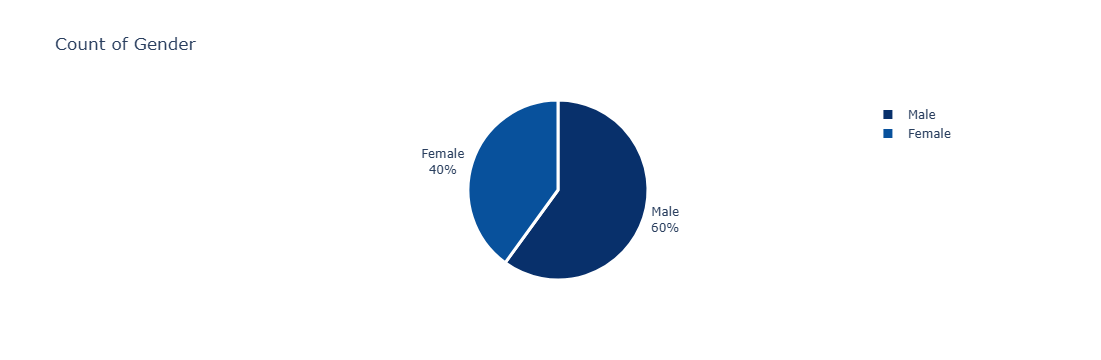

In [20]:
gender_counts = eda_employee['Gender'].value_counts()
fig = px.pie(gender_counts,names=gender_counts.index,values=gender_counts.values, title='Count of Gender',
            labels={'index':'Gender'},color_discrete_sequence=px.colors.sequential.Blues_r)


fig.update_traces(textinfo='percent+label', textposition='outside',marker=dict(line=dict(color='white', width=3)))
fig.show()

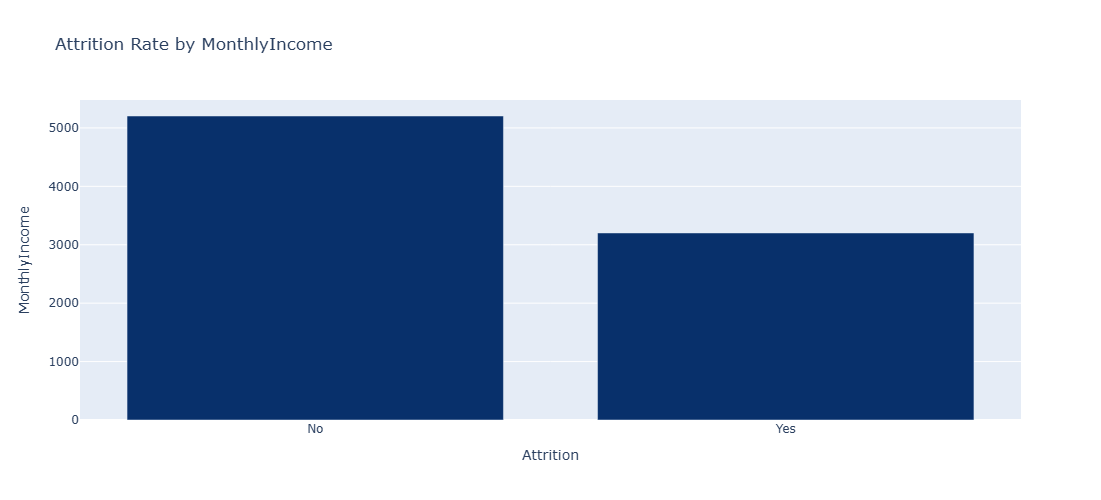

In [21]:
Distance_by_Attrition = eda_employee.groupby(["Attrition"])['MonthlyIncome'].median().reset_index()
fig = px.bar(Distance_by_Attrition, x="Attrition", y="MonthlyIncome", color_discrete_sequence=px.colors.sequential.Blues_r,
            title='Attrition Rate by MonthlyIncome')

fig.update_layout(width=700, height=500)
fig.show()


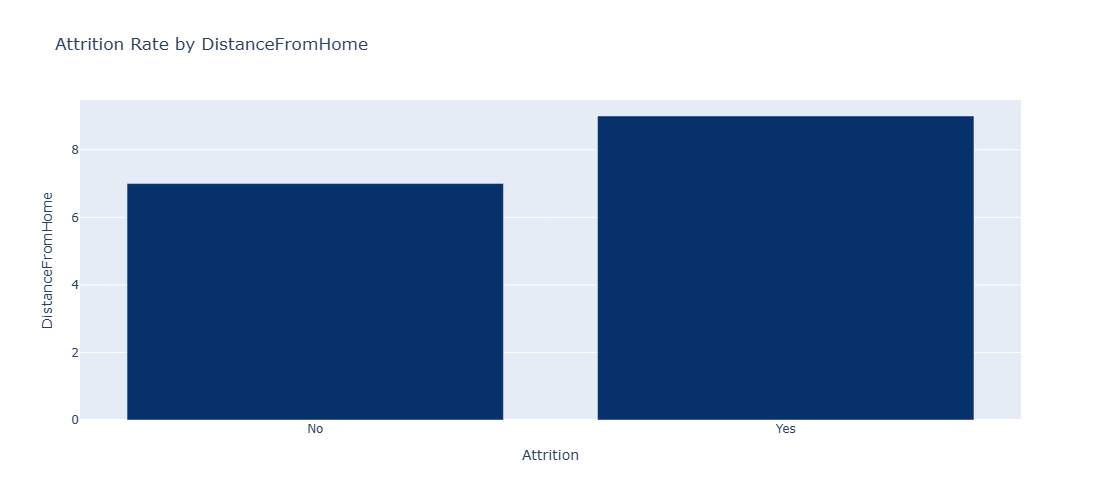

In [22]:
DistanceFromHome_by_Attrition = eda_employee.groupby(["Attrition"])['DistanceFromHome'].median().reset_index()
fig = px.bar(DistanceFromHome_by_Attrition, x="Attrition", y="DistanceFromHome",color_discrete_sequence=px.colors.sequential.Blues_r,
             title='Attrition Rate by DistanceFromHome')

fig.update_layout(width=700, height=500)
fig.show()



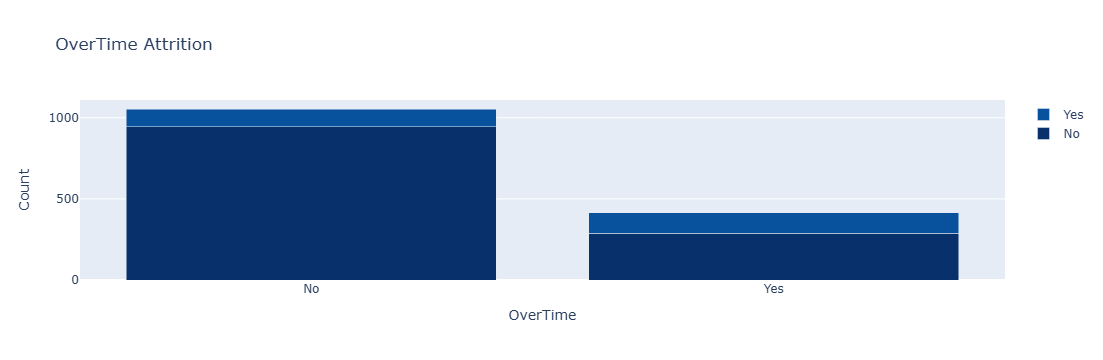

In [27]:
# Create the stacked bar chart
OverTime = eda_employee.groupby(['OverTime', 'Attrition']).size().unstack(fill_value=0)
fig = go.Figure(data=[
    go.Bar(x=OverTime.index, y=OverTime[0], name='No'),
    go.Bar(x=OverTime.index, y=OverTime[1], name='Yes')
])

fig.update_layout(
    title='OverTime Attrition',
    xaxis_title='OverTime',
    yaxis_title='Count',
    barmode='stack',
    colorway=px.colors.sequential.Blues_r
)

fig.show()

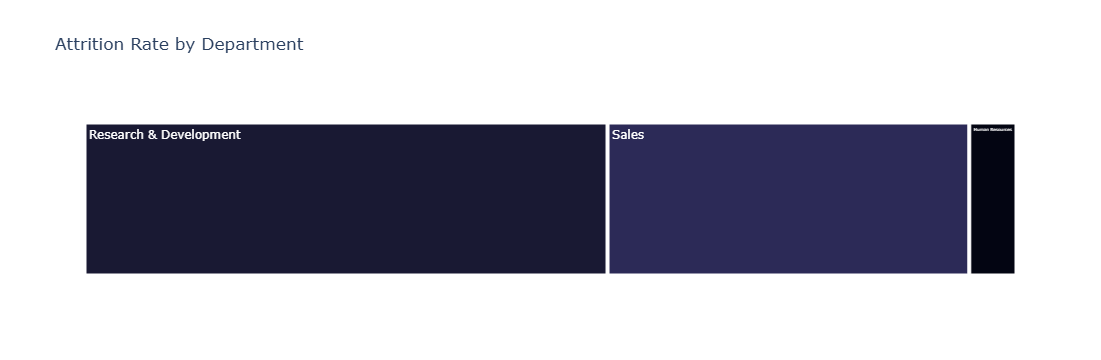

In [23]:
eda_employee['Attrition'] = eda_employee['Attrition'].map({'Yes': 1, 'No': 0})
Department_by_Attrition = eda_employee.groupby('Department')['Attrition'].sum().reset_index()
fig = px.treemap(Department_by_Attrition,path=['Department'],values='Attrition',
                 color='Department',
                 color_discrete_sequence=px.colors.sequential.ice,
                 title='Attrition Rate by Department')

fig.show()

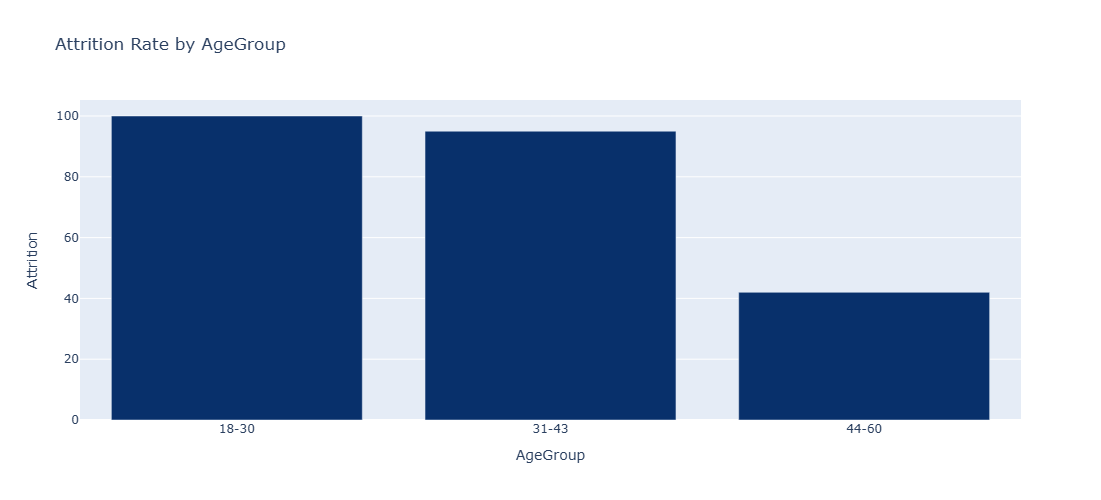

In [24]:
# Group by AgeGroup and count Attrition
AgeGroup_by_Attrition = eda_employee[eda_employee["Attrition"] == 1].groupby(['AgeGroup'], observed=True)["Attrition"].count().reset_index()
fig = px.bar(AgeGroup_by_Attrition, x="AgeGroup", y="Attrition", color_discrete_sequence=px.colors.sequential.Blues_r,
             title='Attrition Rate by AgeGroup')


fig.update_layout(width=700, height=500)
fig.show()

In [25]:
JobRole_by_Attrition = eda_employee[eda_employee["Attrition"] == 1].groupby(["JobRole"])['Attrition'].count().reset_index()

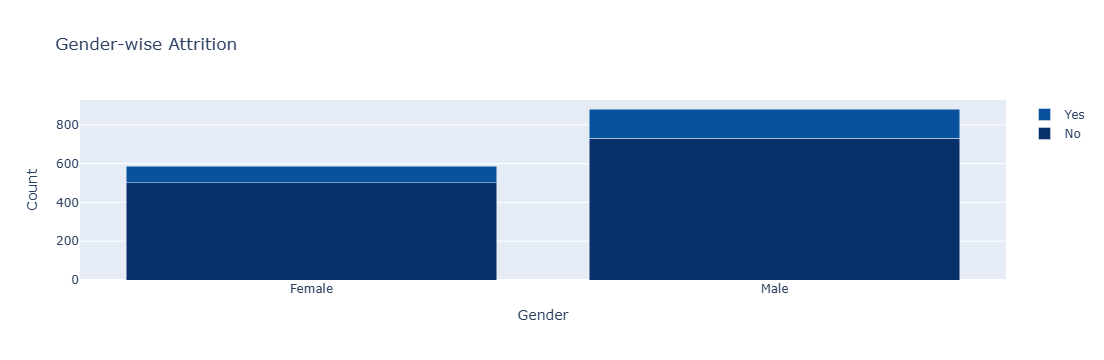

In [28]:
Gender_by_Attrition = eda_employee.groupby(['Gender', 'Attrition']).size().unstack(fill_value=0)
total_employees_by_gender = Gender_by_Attrition.sum(axis=1)

# Calculate the percentages
percentages = Gender_by_Attrition.div(total_employees_by_gender, axis=0).mul(100).round(2)

# Create the stacked bar chart
fig = go.Figure(data=[
    go.Bar(x=Gender_by_Attrition.index, y=Gender_by_Attrition[0], name='No', hovertext=percentages[0].astype(str) + '%'),
    go.Bar(x=Gender_by_Attrition.index, y=Gender_by_Attrition[1], name='Yes', hovertext=percentages[1].astype(str) + '%')
])

fig.update_layout(
    title='Gender-wise Attrition',
    xaxis_title='Gender',
    yaxis_title='Count',
    barmode='stack',
    colorway=px.colors.sequential.Blues_r
)

fig.show()

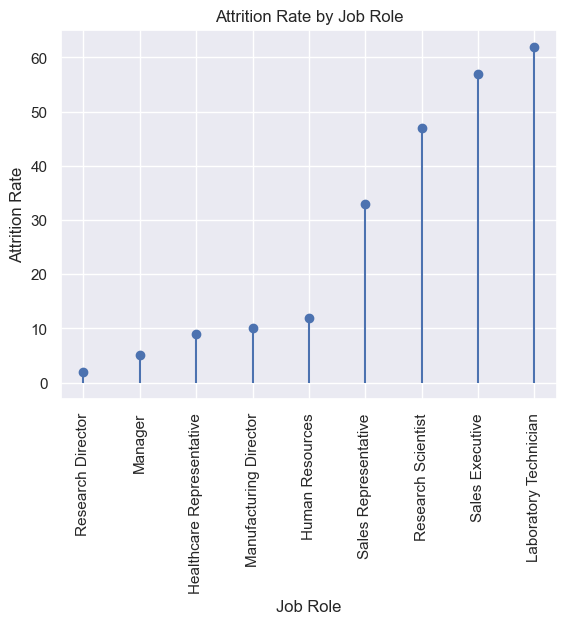

In [26]:
# Reorder the dataframe by the 'Attrition' column
ordered_df = JobRole_by_Attrition.sort_values(by='Attrition')

# Create a range object for x-axis positions
my_range = range(1, len(ordered_df.index) + 1)

# Make the plot using a stem plot
plt.stem(my_range, ordered_df['Attrition'], basefmt=" ")

# Set the x-ticks to be the job roles, positioned correctly along the x-axis
plt.xticks(my_range, ordered_df['JobRole'], rotation=90)  # Rotate labels if they are long

# Label the axes for clarity
plt.xlabel('Job Role')
plt.ylabel('Attrition Rate')

# Optionally, add a title
plt.title('Attrition Rate by Job Role')

# Show the plot
plt.show()

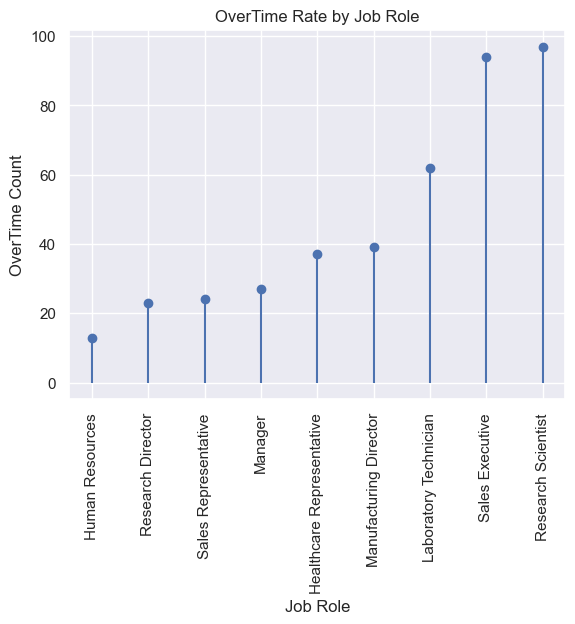

In [29]:
JobRole_by_OverTime = eda_employee[eda_employee["OverTime"] == "Yes"].groupby(["JobRole"])['OverTime'].count().reset_index()

# Reorder the dataframe by the 'Attrition' column
ordered_df = JobRole_by_OverTime.sort_values(by='OverTime')

# Create a range object for x-axis positions
my_range = range(1, len(ordered_df.index) + 1)

# Make the plot using a stem plot
plt.stem(my_range, ordered_df['OverTime'], basefmt=" ")

# Set the x-ticks to be the job roles, positioned correctly along the x-axis
plt.xticks(my_range, ordered_df['JobRole'], rotation=90)  # Rotate labels if they are long

# Label the axes for clarity
plt.xlabel('Job Role')
plt.ylabel('OverTime Count')

# Optionally, add a title
plt.title('OverTime Rate by Job Role')

# Show the plot
plt.show()

# Exploring and dropping unnecessary data

In [30]:
employees.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [31]:
employees.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

No mixed types

In [32]:
employees.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


No deviation in EmployeeCount,StandardHours

In [33]:
employees.describe(include='object')

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
count,1470,1470,1470,1470,1470,1470,1470,1470,1470
unique,2,3,3,6,2,9,3,1,2
top,No,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married,Y,No
freq,1233,1043,961,606,882,326,673,1470,1054


Over18 single unique value

In [34]:
employees.duplicated().any()

False

In [35]:
employees.isnull().sum().any()

False

In [36]:
employees.EmployeeCount.value_counts()

EmployeeCount
1    1470
Name: count, dtype: int64

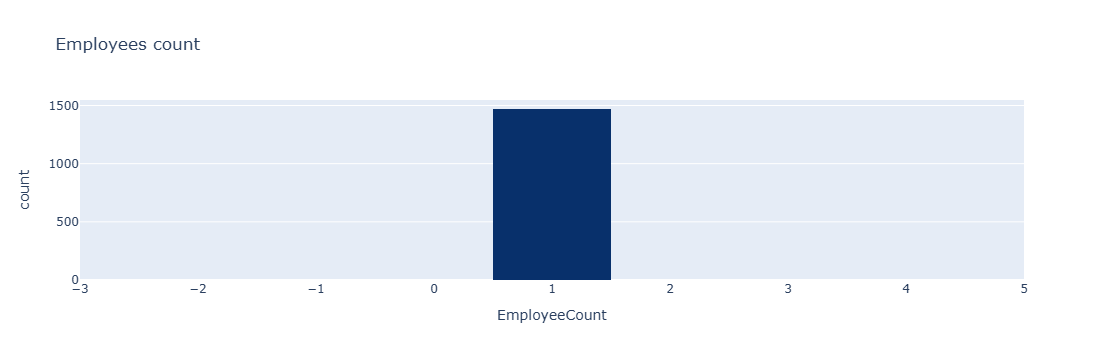

In [37]:
px.histogram(employees,'EmployeeCount',color_discrete_sequence=px.colors.sequential.Blues_r,range_x=(-3,5),title='Employees count')

In [38]:
employees.StandardHours.value_counts()

StandardHours
80    1470
Name: count, dtype: int64

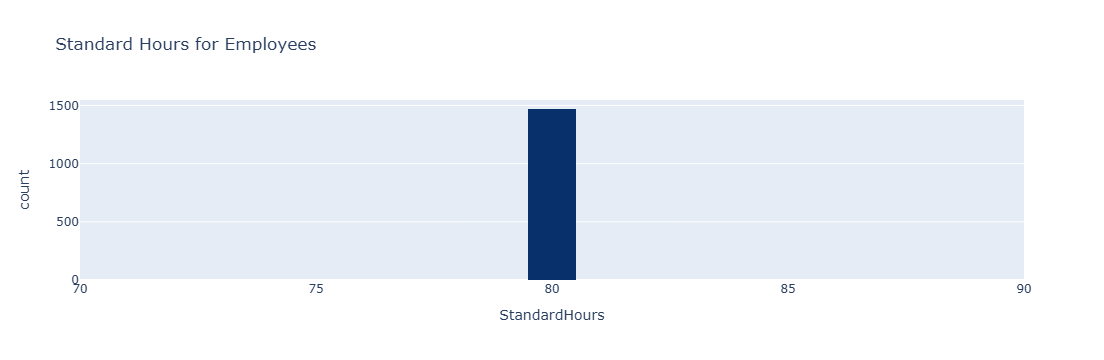

In [39]:
px.histogram(employees,'StandardHours',color_discrete_sequence=px.colors.sequential.Blues_r,range_x=(70,90),title='Standard Hours for Employees')

In [40]:
employees.Over18.value_counts()

Over18
Y    1470
Name: count, dtype: int64

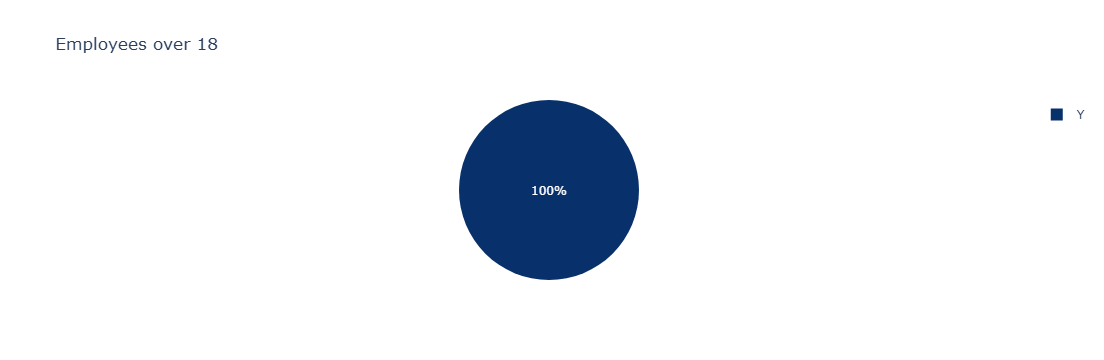

In [41]:
px.pie(employees,'Over18',color_discrete_sequence=px.colors.sequential.Blues_r,title='Employees over 18')

In [42]:
employees.drop(['EmployeeCount','StandardHours','Over18'],axis=1,inplace=True)

**splitting data**

In [43]:
test_yes = employees[employees.Attrition == 'Yes'].sample(n=100, random_state=123)
test_no = employees[employees.Attrition == 'No'].sample(n=100, random_state=123)

test = pd.concat([test_yes,test_no],axis=0)

train = employees.drop(test.index)
train.shape,test.shape
((1270, 32), (200, 32))

((1270, 32), (200, 32))

In [44]:
test.Attrition.value_counts()

Attrition
Yes    100
No     100
Name: count, dtype: int64

In [45]:
categorical_col = train.select_dtypes(include='object').columns
# adding already encoded data
categorical_col = categorical_col.append(pd.Index(['Education','EnvironmentSatisfaction','JobInvolvement','JobSatisfaction','PerformanceRating','RelationshipSatisfaction','WorkLifeBalance']))
categorical_col 

Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'OverTime', 'Education',
       'EnvironmentSatisfaction', 'JobInvolvement', 'JobSatisfaction',
       'PerformanceRating', 'RelationshipSatisfaction', 'WorkLifeBalance'],
      dtype='object')

In [46]:
numerical_col = train.columns.difference(categorical_col)
numerical_col

Index(['Age', 'DailyRate', 'DistanceFromHome', 'EmployeeNumber', 'HourlyRate',
       'JobLevel', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

# Encoding

In [47]:
for col in categorical_col:
    print(f'{col} : {train[col].unique()}')

Attrition : ['Yes' 'No']
BusinessTravel : ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
Department : ['Sales' 'Research & Development' 'Human Resources']
EducationField : ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
Gender : ['Female' 'Male']
JobRole : ['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Director' 'Human Resources']
MaritalStatus : ['Single' 'Married' 'Divorced']
OverTime : ['Yes' 'No']
Education : [2 1 4 3 5]
EnvironmentSatisfaction : [2 3 4 1]
JobInvolvement : [3 2 4 1]
JobSatisfaction : [4 2 3 1]
PerformanceRating : [3 4]
RelationshipSatisfaction : [1 4 2 3]
WorkLifeBalance : [1 3 2 4]


In [48]:
train.Attrition = train.Attrition.map({'No':0,'Yes':1})
train.OverTime  = train.OverTime.map({'No':0,'Yes':1})
train.Gender  = train.Gender.map({'Male':0,'Female':1})

#repeat for test
test.Attrition = test.Attrition.map({'No':0,'Yes':1})
test.OverTime  = test.OverTime.map({'No':0,'Yes':1})
test.Gender  = test.Gender.map({'Male':0,'Female':1})

**Nominal**

In [49]:
onehot = ce.OneHotEncoder(cols=['BusinessTravel','Department','EducationField','JobRole','MaritalStatus'])
train = onehot.fit_transform(train)

#repeat for test
test = onehot.transform(test)

In [50]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1270 entries, 0 to 1469
Data columns (total 51 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Age                       1270 non-null   int64
 1   Attrition                 1270 non-null   int64
 2   BusinessTravel_1          1270 non-null   int64
 3   BusinessTravel_2          1270 non-null   int64
 4   BusinessTravel_3          1270 non-null   int64
 5   DailyRate                 1270 non-null   int64
 6   Department_1              1270 non-null   int64
 7   Department_2              1270 non-null   int64
 8   Department_3              1270 non-null   int64
 9   DistanceFromHome          1270 non-null   int64
 10  Education                 1270 non-null   int64
 11  EducationField_1          1270 non-null   int64
 12  EducationField_2          1270 non-null   int64
 13  EducationField_3          1270 non-null   int64
 14  EducationField_4          1270 non-null   int

In [51]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, 689 to 209
Data columns (total 51 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Age                       200 non-null    int64
 1   Attrition                 200 non-null    int64
 2   BusinessTravel_1          200 non-null    int64
 3   BusinessTravel_2          200 non-null    int64
 4   BusinessTravel_3          200 non-null    int64
 5   DailyRate                 200 non-null    int64
 6   Department_1              200 non-null    int64
 7   Department_2              200 non-null    int64
 8   Department_3              200 non-null    int64
 9   DistanceFromHome          200 non-null    int64
 10  Education                 200 non-null    int64
 11  EducationField_1          200 non-null    int64
 12  EducationField_2          200 non-null    int64
 13  EducationField_3          200 non-null    int64
 14  EducationField_4          200 non-null    int

# Feature Selection

In [52]:
corr_matrix = train.corr()
corr_pairs = corr_matrix.unstack()
corr_pairs[(corr_pairs >= 0.8) & (corr_pairs < 1)]

Department_1   JobRole_1        0.815604
Department_3   JobRole_9        0.915751
JobLevel       MonthlyIncome    0.950743
JobRole_1      Department_1     0.815604
JobRole_9      Department_3     0.915751
MonthlyIncome  JobLevel         0.950743
dtype: float64

In [53]:
corr_matrix = train.corr(method='spearman')
corr_pairs = corr_matrix.unstack()
corr_pairs[(corr_pairs >= 0.8) & (corr_pairs < 1)]

Department_1          JobRole_1               0.815604
Department_3          JobRole_9               0.915751
JobLevel              MonthlyIncome           0.922261
JobRole_1             Department_1            0.815604
JobRole_9             Department_3            0.915751
MonthlyIncome         JobLevel                0.922261
YearsAtCompany        YearsInCurrentRole      0.854854
                      YearsWithCurrManager    0.832761
YearsInCurrentRole    YearsAtCompany          0.854854
YearsWithCurrManager  YearsAtCompany          0.832761
dtype: float64

**nonlinear**

In [54]:
px.scatter(train,'YearsAtCompany','YearsInCurrentRole')

In [55]:
px.scatter(train,'YearsAtCompany','YearsWithCurrManager')

**Dropping columns with high multicollinearity**

<Axes: >

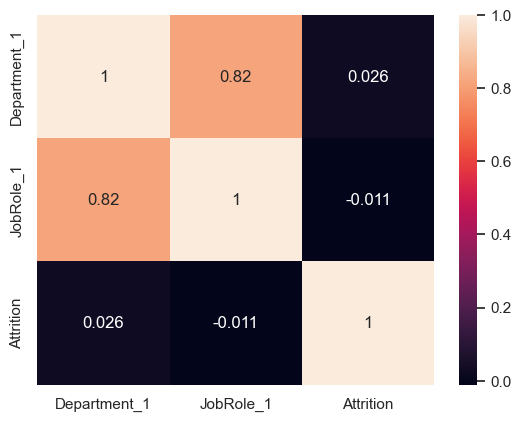

In [56]:
sns.heatmap(train[['Department_1','JobRole_1','Attrition']].corr(method='spearman'),annot=True)

In [57]:
train.drop('JobRole_1',axis=1,inplace=True)

# repeat for test
test.drop('JobRole_1',axis=1,inplace=True)

<Axes: >

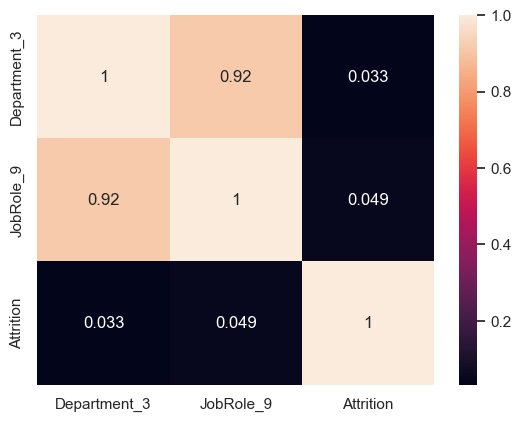

In [58]:
sns.heatmap(train[['Department_3','JobRole_9','Attrition']].corr(method='spearman'),annot=True)

In [59]:
train.drop('Department_3',axis=1,inplace=True)

# repeat for test
test.drop('Department_3',axis=1,inplace=True)

<Axes: >

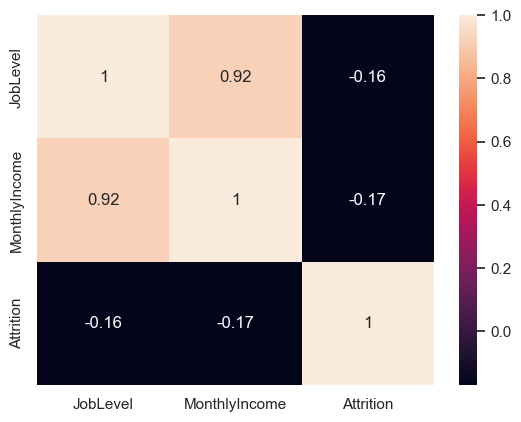

In [60]:
sns.heatmap(train[['JobLevel','MonthlyIncome','Attrition']].corr(method='spearman'),annot=True)

In [61]:
train.drop('JobLevel',axis=1,inplace=True)

# repeat for test
test.drop('JobLevel',axis=1,inplace=True)

<Axes: >

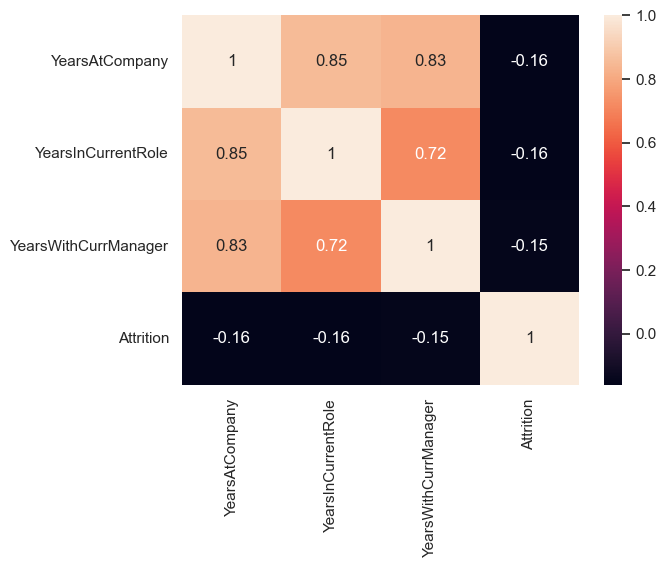

In [62]:
sns.heatmap(train[['YearsAtCompany','YearsInCurrentRole','YearsWithCurrManager','Attrition']].corr(method='spearman'),annot=True)

In [63]:
train.drop(['YearsInCurrentRole','YearsWithCurrManager'],axis=1,inplace=True)

# repeat for test
test.drop(['YearsInCurrentRole','YearsWithCurrManager'],axis=1,inplace=True)

In [64]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

vif = pd.DataFrame()
vif['Features'] = train.columns
vif['VIF'] = [variance_inflation_factor(add_constant(train.values),i) for i in range(train.shape[1])]
cols = vif.Features[vif.VIF > 5].tolist()
cols

c:\Users\menna\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\regression\linear_model.py:1783: RuntimeWarning:

divide by zero encountered in scalar divide

c:\Users\menna\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning:

divide by zero encountered in scalar divide



['BusinessTravel_2',
 'BusinessTravel_3',
 'DailyRate',
 'Department_2',
 'DistanceFromHome',
 'EducationField_2',
 'EducationField_3',
 'EducationField_4',
 'EducationField_5',
 'EducationField_6',
 'EmployeeNumber',
 'JobRole_3',
 'JobRole_4',
 'JobRole_5',
 'JobRole_6',
 'JobRole_9',
 'JobSatisfaction',
 'MaritalStatus_2',
 'MaritalStatus_3',
 'MonthlyIncome',
 'MonthlyRate']

<Axes: >

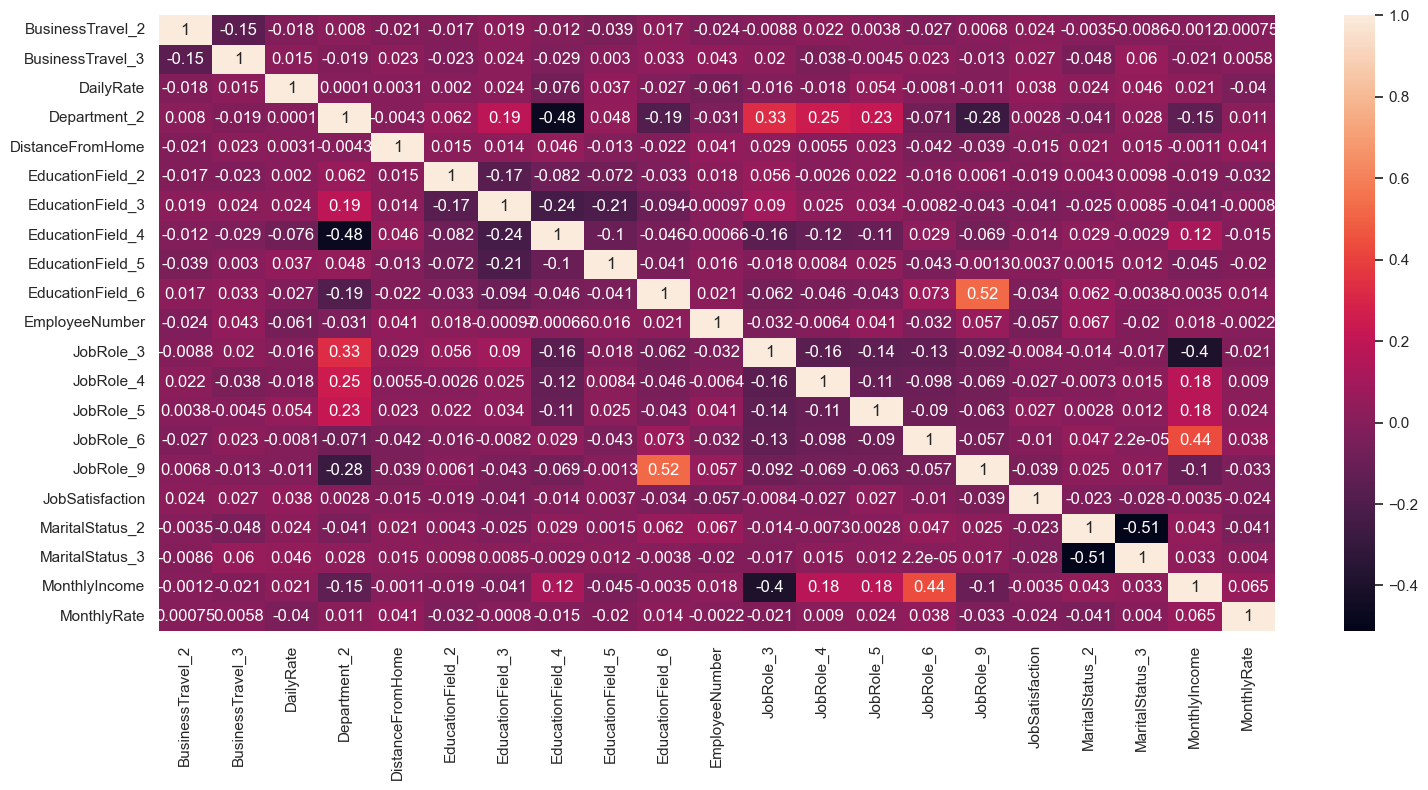

In [65]:
plt.figure(figsize=(18,8))
sns.heatmap(train[cols].corr(method='spearman'),annot=True)

*no need to drop*

In [66]:
train.corr(method='spearman').Attrition.abs().sort_values(ascending=False)

Attrition                   1.000000
OverTime                    0.231988
TotalWorkingYears           0.172981
MonthlyIncome               0.169662
YearsAtCompany              0.160536
Age                         0.150407
StockOptionLevel            0.119755
JobRole_3                   0.115813
MaritalStatus_1             0.108864
EnvironmentSatisfaction     0.098866
JobRole_7                   0.095902
JobInvolvement              0.094138
JobSatisfaction             0.084632
BusinessTravel_2            0.078166
DistanceFromHome            0.077321
JobRole_8                   0.072863
MaritalStatus_2             0.067608
TrainingTimesLastYear       0.064802
JobRole_5                   0.064801
JobRole_4                   0.060904
BusinessTravel_3            0.057399
YearsSinceLastPromotion     0.055441
JobRole_6                   0.051427
JobRole_9                   0.048948
Department_2                0.039637
DailyRate                   0.039439
EducationField_1            0.039347
M

*low correlation so i will drop last 5 columns*

In [67]:
train.drop(['MonthlyRate','EducationField_3','PerformanceRating','EducationField_2','JobRole_2'],axis=1,inplace=True)

# repeat for test
test.drop(['MonthlyRate','EducationField_3','PerformanceRating','EducationField_2','JobRole_2'],axis=1,inplace=True)

# Handling Imbalanced Labels 

In [68]:
train.Attrition.value_counts()

Attrition
0    1133
1     137
Name: count, dtype: int64

In [69]:
px.pie(train,'Attrition',color_discrete_sequence=px.colors.sequential.Blues_r,title='Attrition before balancing')

In [70]:
X_train = train.drop('Attrition',axis=1)
y_train = train.Attrition

X_test = test.drop('Attrition',axis=1)
y_test = test.Attrition

#just train
under_sampler = RandomUnderSampler(random_state=42)
X_train_under,y_train_under = under_sampler.fit_resample(X_train,y_train)

over_sampler = SMOTE(random_state=42)
X_train_over,y_train_over = over_sampler.fit_resample(X_train,y_train)


train_under = pd.concat([X_train_under,y_train_under],axis=1)
train_over = pd.concat([X_train_over,y_train_over],axis=1)

train_under.shape,train_over.shape

((274, 41), (2266, 41))

In [71]:
px.pie(train_under,'Attrition',color_discrete_sequence=px.colors.sequential.Blues_r,title='Attrition After balancing')

In [72]:
px.pie(train_over,'Attrition',color_discrete_sequence=px.colors.sequential.Blues_r,title='Attrition After balancing')

# Modeling

In [73]:
def grid_search(model,param_grid,X_train,y_train,go=0):
    results = {}
    scalers = [StandardScaler(),MinMaxScaler(),RobustScaler()]
    for scaler in scalers:
        pipe = Pipeline([('scaler',scaler),('model',model)])
        if (isinstance(model, RandomForestClassifier)) or (go==1):
            search = RandomizedSearchCV(pipe,param_grid,cv=5,scoring='accuracy')
        else:
            search = GridSearchCV(pipe,param_grid,cv=5,scoring='accuracy')
        search.fit(X_train,y_train)
        results[scaler] = search.best_params_
    return results

In [74]:
under_sampling_record = {}
over_sampling_record = {}

## Under Sampling

### Logistic Regression

#### Not customized

In [75]:
param_grid = {'model__C':[0.1,0.15,0.2],'model__max_iter':[30,40,60,80,100]}
result = grid_search(LogisticRegression(random_state=42),param_grid,X_train_under,y_train_under)
result

{StandardScaler(): {'model__C': 0.1, 'model__max_iter': 30},
 MinMaxScaler(): {'model__C': 0.1, 'model__max_iter': 30},
 RobustScaler(): {'model__C': 0.1, 'model__max_iter': 30}}

**Standard Scaler**

Score on train 0.7773722627737226
Score on test 0.795
              precision    recall  f1-score   support

           0       0.81      0.77      0.79       100
           1       0.78      0.82      0.80       100

    accuracy                           0.80       200
   macro avg       0.80      0.79      0.79       200
weighted avg       0.80      0.80      0.79       200



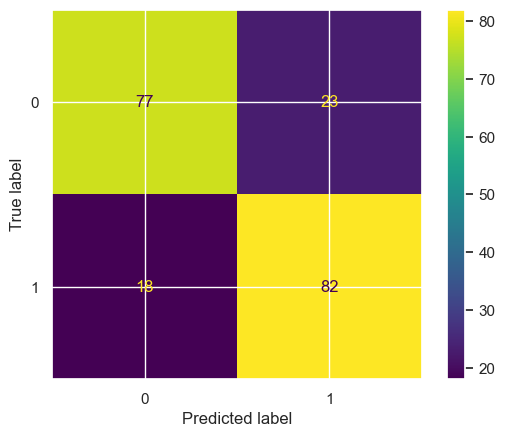

In [76]:
scaler = StandardScaler()
X_train_under_scaled = scaler.fit_transform(X_train_under)
X_test_scaled = scaler.transform(X_test)

log_reg = LogisticRegression(max_iter=30,C=0.1,random_state=42)
log_reg.fit(X_train_under_scaled,y_train_under)

print('Score on train',log_reg.score(X_train_under_scaled,y_train_under))
print('Score on test',log_reg.score(X_test_scaled,y_test))

y_pred = log_reg.predict(X_test_scaled)

print(classification_report(y_test,y_pred))
cm = confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

under_sampling_record['LogisticRegression'] = []
under_sampling_record['LogisticRegression'].append([log_reg.score(X_train_under_scaled,y_train_under),log_reg.score(X_test_scaled,y_test)])

**MinMax Scaler**

Score on train 0.7372262773722628
Score on test 0.765
              precision    recall  f1-score   support

           0       0.77      0.75      0.76       100
           1       0.76      0.78      0.77       100

    accuracy                           0.77       200
   macro avg       0.77      0.77      0.76       200
weighted avg       0.77      0.77      0.76       200



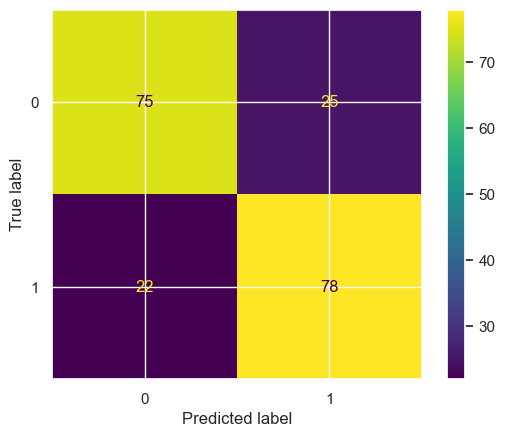

In [77]:
scaler = MinMaxScaler()
X_train_under_scaled = scaler.fit_transform(X_train_under)
X_test_scaled = scaler.transform(X_test)

log_reg = LogisticRegression(max_iter=30,C=0.1,random_state=42)
log_reg.fit(X_train_under_scaled,y_train_under)

print('Score on train',log_reg.score(X_train_under_scaled,y_train_under))
print('Score on test',log_reg.score(X_test_scaled,y_test))

y_pred = log_reg.predict(X_test_scaled)

print(classification_report(y_test,y_pred))
cm = confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

under_sampling_record['LogisticRegression'].append([log_reg.score(X_train_under_scaled,y_train_under),log_reg.score(X_test_scaled,y_test)])

**Robust Scaler**

Score on train 0.7554744525547445
Score on test 0.785
              precision    recall  f1-score   support

           0       0.82      0.73      0.77       100
           1       0.76      0.84      0.80       100

    accuracy                           0.79       200
   macro avg       0.79      0.78      0.78       200
weighted avg       0.79      0.79      0.78       200



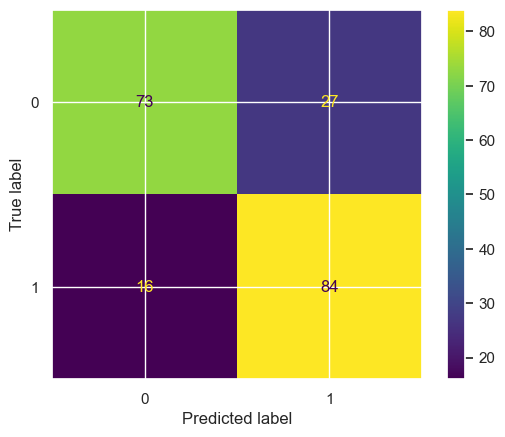

In [78]:
scaler = RobustScaler()
X_train_under_scaled = scaler.fit_transform(X_train_under)
X_test_scaled = scaler.transform(X_test)

log_reg = LogisticRegression(max_iter=30,C=0.1,random_state=42)
log_reg.fit(X_train_under_scaled,y_train_under)

print('Score on train',log_reg.score(X_train_under_scaled,y_train_under))
print('Score on test',log_reg.score(X_test_scaled,y_test))

y_pred = log_reg.predict(X_test_scaled)

print(classification_report(y_test,y_pred))
cm = confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

under_sampling_record['LogisticRegression'].append([log_reg.score(X_train_under_scaled,y_train_under),log_reg.score(X_test_scaled,y_test)])

#### Customized

Score on train 0.7627737226277372
              precision    recall  f1-score   support

           0       0.82      0.78      0.80       100
           1       0.79      0.83      0.81       100

    accuracy                           0.81       200
   macro avg       0.81      0.80      0.80       200
weighted avg       0.81      0.81      0.80       200



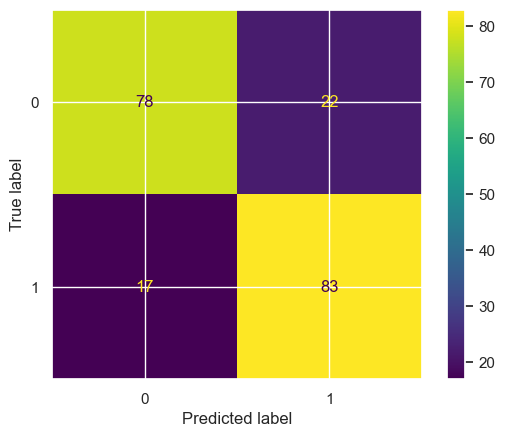

In [79]:
scaler = RobustScaler()
X_train_under_scaled = scaler.fit_transform(X_train_under)
X_test_scaled = scaler.transform(X_test)

log_reg = LogisticRegression(max_iter=100,C=0.15,random_state=42)
log_reg.fit(X_train_under_scaled,y_train_under)

print('Score on train',log_reg.score(X_train_under_scaled,y_train_under))

x = log_reg.decision_function(X_test_scaled) > 0.1
print(classification_report(y_test,x))
cm = confusion_matrix(y_test,x)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

### KNN

In [80]:
param_grid = {'model__n_neighbors':[3,5,10,30,60,80],'model__p':[1,2,3]}
result = grid_search(KNeighborsClassifier(),param_grid,X_train_under,y_train_under)
result

{StandardScaler(): {'model__n_neighbors': 60, 'model__p': 2},
 MinMaxScaler(): {'model__n_neighbors': 80, 'model__p': 1},
 RobustScaler(): {'model__n_neighbors': 60, 'model__p': 1}}

**Standard Scaler**

Score on train 0.6897810218978102
Score on test 0.745
              precision    recall  f1-score   support

           0       0.83      0.62      0.71       100
           1       0.70      0.87      0.77       100

    accuracy                           0.74       200
   macro avg       0.76      0.74      0.74       200
weighted avg       0.76      0.74      0.74       200



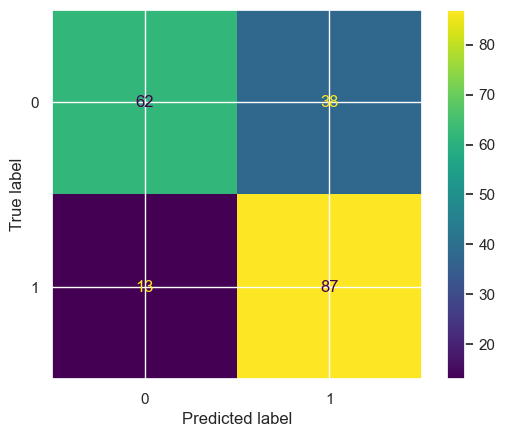

In [81]:
scaler = StandardScaler()
X_train_under_scaled = scaler.fit_transform(X_train_under)
X_test_scaled = scaler.transform(X_test)

knn = KNeighborsClassifier(n_neighbors=60,p=2)
knn.fit(X_train_under_scaled,y_train_under)

print('Score on train',knn.score(X_train_under_scaled,y_train_under))
print('Score on test',knn.score(X_test_scaled,y_test))

y_pred = knn.predict(X_test_scaled)

print(classification_report(y_test,y_pred))
cm = confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

under_sampling_record['KNeighborsClassifier'] = []
under_sampling_record['KNeighborsClassifier'].append([knn.score(X_train_under_scaled,y_train_under),knn.score(X_test_scaled,y_test)])

**MinMax Scaler**

Score on train 0.7116788321167883
Score on test 0.71
              precision    recall  f1-score   support

           0       0.75      0.63      0.68       100
           1       0.68      0.79      0.73       100

    accuracy                           0.71       200
   macro avg       0.72      0.71      0.71       200
weighted avg       0.72      0.71      0.71       200



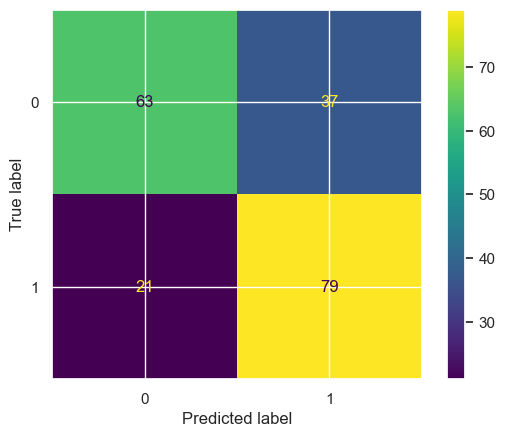

In [82]:
scaler = MinMaxScaler()
X_train_under_scaled = scaler.fit_transform(X_train_under)
X_test_scaled = scaler.transform(X_test)

knn = KNeighborsClassifier(n_neighbors=80,p=1)
knn.fit(X_train_under_scaled,y_train_under)

print('Score on train',knn.score(X_train_under_scaled,y_train_under))
print('Score on test',knn.score(X_test_scaled,y_test))

y_pred = knn.predict(X_test_scaled)

print(classification_report(y_test,y_pred))
cm = confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

under_sampling_record['KNeighborsClassifier'].append([knn.score(X_train_under_scaled,y_train_under),knn.score(X_test_scaled,y_test)])

**Robust Scaler**

Score on train 0.7153284671532847
Score on test 0.755
              precision    recall  f1-score   support

           0       0.77      0.73      0.75       100
           1       0.74      0.78      0.76       100

    accuracy                           0.76       200
   macro avg       0.76      0.76      0.75       200
weighted avg       0.76      0.76      0.75       200



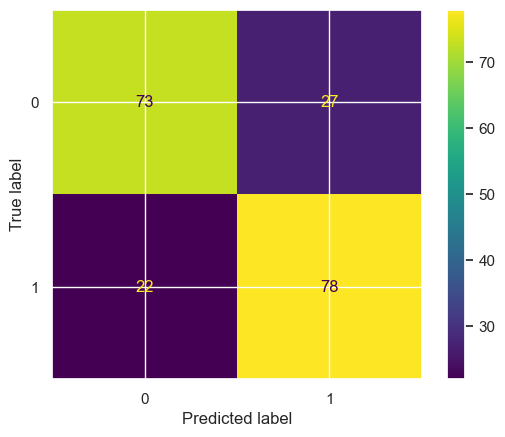

In [83]:
scaler = RobustScaler()
X_train_under_scaled = scaler.fit_transform(X_train_under)
X_test_scaled = scaler.transform(X_test)

knn = KNeighborsClassifier(n_neighbors=60,p=1)
knn.fit(X_train_under_scaled,y_train_under)

print('Score on train',knn.score(X_train_under_scaled,y_train_under))
print('Score on test',knn.score(X_test_scaled,y_test))

y_pred = knn.predict(X_test_scaled)

print(classification_report(y_test,y_pred))
cm = confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

under_sampling_record['KNeighborsClassifier'].append([knn.score(X_train_under_scaled,y_train_under),knn.score(X_test_scaled,y_test)])

### SVC

#### Not customized

In [84]:
param_grid = {'model__C':[0.05,0.1,0.15,0.2,1,5],'model__kernel':['linear','poly','rbf'],'model__degree':[2,3,4],'model__gamma':['scale','auto']}
result = grid_search(SVC(random_state=42),param_grid,X_train_under,y_train_under)
result

{StandardScaler(): {'model__C': 1,
  'model__degree': 2,
  'model__gamma': 'scale',
  'model__kernel': 'rbf'},
 MinMaxScaler(): {'model__C': 0.15,
  'model__degree': 3,
  'model__gamma': 'scale',
  'model__kernel': 'poly'},
 RobustScaler(): {'model__C': 0.2,
  'model__degree': 2,
  'model__gamma': 'scale',
  'model__kernel': 'linear'}}

**Standard Scaler**

Score on train 0.916058394160584
Score on test 0.8
              precision    recall  f1-score   support

           0       0.81      0.79      0.80       100
           1       0.79      0.81      0.80       100

    accuracy                           0.80       200
   macro avg       0.80      0.80      0.80       200
weighted avg       0.80      0.80      0.80       200



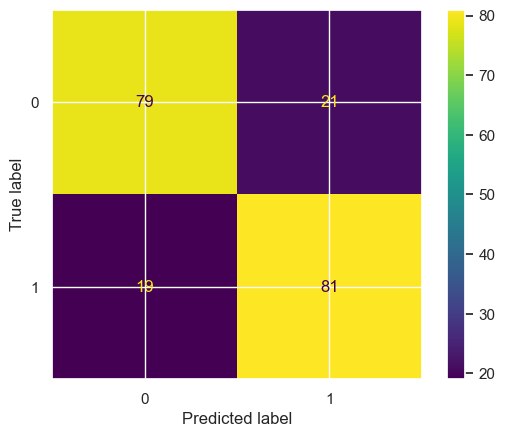

In [85]:
scaler = StandardScaler()
X_train_under_scaled = scaler.fit_transform(X_train_under)
X_test_scaled = scaler.transform(X_test)

svc = SVC(C=1,degree=2,gamma='scale',kernel='rbf',random_state=42)
svc.fit(X_train_under_scaled,y_train_under)

print('Score on train',svc.score(X_train_under_scaled,y_train_under))
print('Score on test',svc.score(X_test_scaled,y_test))

y_pred = svc.predict(X_test_scaled)

print(classification_report(y_test,y_pred))
cm = confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

under_sampling_record['SVC'] = []
under_sampling_record['SVC'].append([svc.score(X_train_under_scaled,y_train_under),svc.score(X_test_scaled,y_test)])

**MinMax Scaler**

Score on train 0.7992700729927007
Score on test 0.75
              precision    recall  f1-score   support

           0       0.85      0.61      0.71       100
           1       0.70      0.89      0.78       100

    accuracy                           0.75       200
   macro avg       0.77      0.75      0.75       200
weighted avg       0.77      0.75      0.75       200



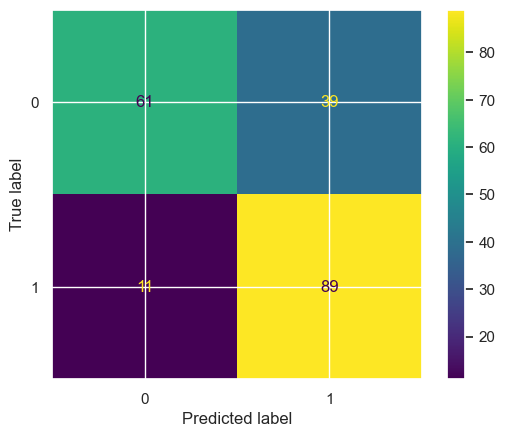

In [86]:
scaler = MinMaxScaler()
X_train_under_scaled = scaler.fit_transform(X_train_under)
X_test_scaled = scaler.transform(X_test)

svc = SVC(C=0.15,degree=3,gamma='scale',kernel='poly',random_state=42)
svc.fit(X_train_under_scaled,y_train_under)

print('Score on train',svc.score(X_train_under_scaled,y_train_under))
print('Score on test',svc.score(X_test_scaled,y_test))

y_pred = svc.predict(X_test_scaled)

print(classification_report(y_test,y_pred))
cm = confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

under_sampling_record['SVC'].append([svc.score(X_train_under_scaled,y_train_under),svc.score(X_test_scaled,y_test)])

**Robust Scaler**

Score on train 0.7773722627737226
Score on test 0.78
              precision    recall  f1-score   support

           0       0.81      0.73      0.77       100
           1       0.75      0.83      0.79       100

    accuracy                           0.78       200
   macro avg       0.78      0.78      0.78       200
weighted avg       0.78      0.78      0.78       200



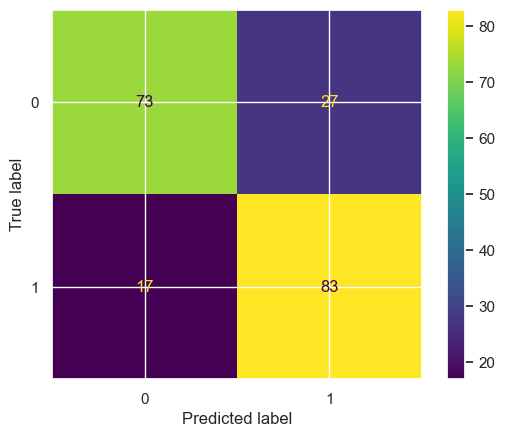

In [87]:
scaler = RobustScaler()
X_train_under_scaled = scaler.fit_transform(X_train_under)
X_test_scaled = scaler.transform(X_test)

svc = SVC(C=0.2,degree=2,gamma='scale',kernel='linear',random_state=42)
svc.fit(X_train_under_scaled,y_train_under)

print('Score on train',svc.score(X_train_under_scaled,y_train_under))
print('Score on test',svc.score(X_test_scaled,y_test))

y_pred = svc.predict(X_test_scaled)

print(classification_report(y_test,y_pred))
cm = confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

under_sampling_record['SVC'].append([svc.score(X_train_under_scaled,y_train_under),svc.score(X_test_scaled,y_test)])

#### Customized

Score on train 0.7445255474452555
              precision    recall  f1-score   support

           0       0.81      0.79      0.80       100
           1       0.79      0.81      0.80       100

    accuracy                           0.80       200
   macro avg       0.80      0.80      0.80       200
weighted avg       0.80      0.80      0.80       200

[[79 21]
 [19 81]]


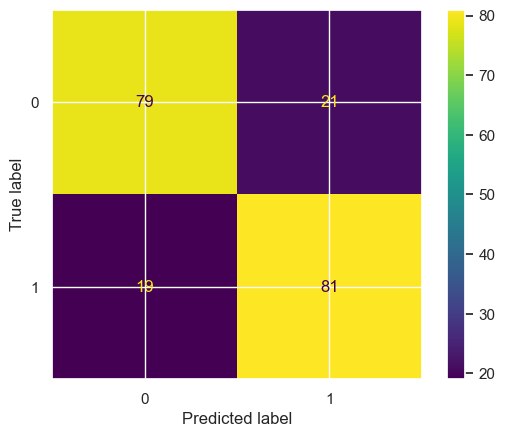

In [88]:
scaler = RobustScaler()
X_train_under_scaled = scaler.fit_transform(X_train_under)
X_test_scaled = scaler.transform(X_test)

svc = SVC(C=0.09,kernel='linear',random_state=42)
svc.fit(X_train_under_scaled,y_train_under)

print('Score on train',svc.score(X_train_under_scaled,y_train_under))

x = svc.decision_function(X_test_scaled) > 0.12
print(classification_report(y_test,x))
cm = confusion_matrix(y_test,x)
print(confusion_matrix(y_test,x))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

### Naive

**Standard Scaler**

Score on train 0.6788321167883211
Score on test 0.685
              precision    recall  f1-score   support

           0       0.77      0.53      0.63       100
           1       0.64      0.84      0.73       100

    accuracy                           0.69       200
   macro avg       0.70      0.69      0.68       200
weighted avg       0.70      0.69      0.68       200



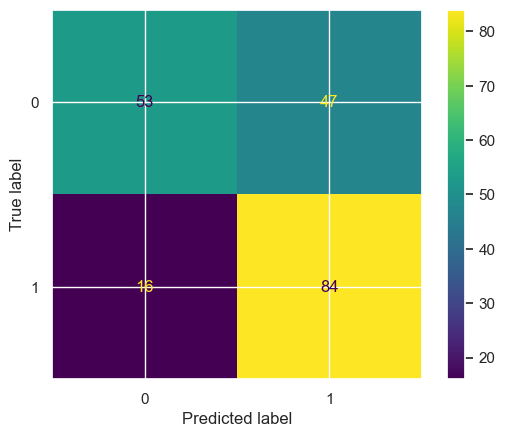

In [89]:
scaler = StandardScaler()
X_train_under_scaled = scaler.fit_transform(X_train_under)
X_test_scaled = scaler.transform(X_test)

nb = GaussianNB()
nb.fit(X_train_under_scaled,y_train_under)

print('Score on train',nb.score(X_train_under_scaled,y_train_under))
print('Score on test',nb.score(X_test_scaled,y_test))

y_pred = nb.predict(X_test_scaled)
print(classification_report(y_test,y_pred))

cm = confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

under_sampling_record['GaussianNB'] = []
under_sampling_record['GaussianNB'].append([nb.score(X_train_under_scaled,y_train_under),nb.score(X_test_scaled,y_test)])

**MinMax Scaler**

Score on train 0.6788321167883211
Score on test 0.685
              precision    recall  f1-score   support

           0       0.77      0.53      0.63       100
           1       0.64      0.84      0.73       100

    accuracy                           0.69       200
   macro avg       0.70      0.69      0.68       200
weighted avg       0.70      0.69      0.68       200



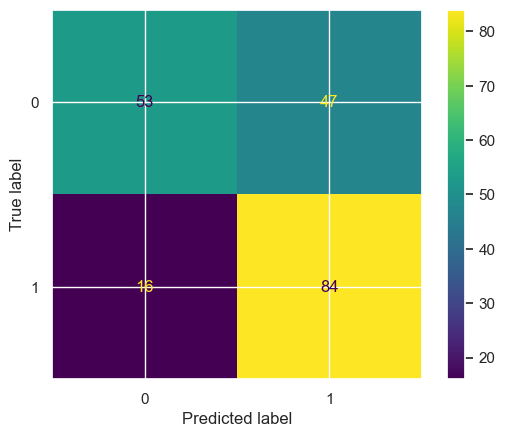

In [90]:
scaler = MinMaxScaler()
X_train_under_scaled = scaler.fit_transform(X_train_under)
X_test_scaled = scaler.transform(X_test)

nb = GaussianNB()
nb.fit(X_train_under_scaled,y_train_under)

print('Score on train',nb.score(X_train_under_scaled,y_train_under))
print('Score on test',nb.score(X_test_scaled,y_test))

y_pred = nb.predict(X_test_scaled)
print(classification_report(y_test,y_pred))

cm = confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

under_sampling_record['GaussianNB'].append([nb.score(X_train_under_scaled,y_train_under),nb.score(X_test_scaled,y_test)])

**Robust Scaler**

Score on train 0.6788321167883211
Score on test 0.685
              precision    recall  f1-score   support

           0       0.77      0.53      0.63       100
           1       0.64      0.84      0.73       100

    accuracy                           0.69       200
   macro avg       0.70      0.69      0.68       200
weighted avg       0.70      0.69      0.68       200



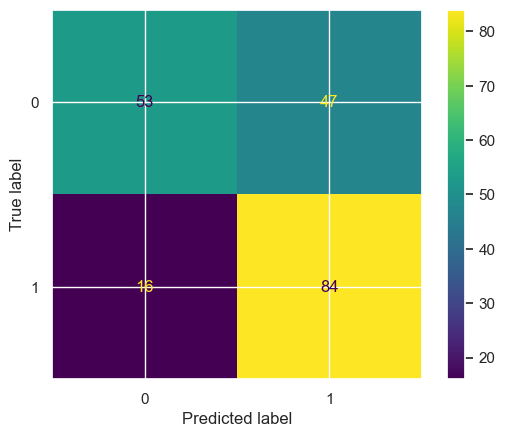

In [91]:
scaler = RobustScaler()
X_train_under_scaled = scaler.fit_transform(X_train_under)
X_test_scaled = scaler.transform(X_test)

nb = GaussianNB()
nb.fit(X_train_under_scaled,y_train_under)

print('Score on train',nb.score(X_train_under_scaled,y_train_under))
print('Score on test',nb.score(X_test_scaled,y_test))

y_pred = nb.predict(X_test_scaled)
print(classification_report(y_test,y_pred))

cm = confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

under_sampling_record['GaussianNB'].append([nb.score(X_train_under_scaled,y_train_under),nb.score(X_test_scaled,y_test)])

### Decision Tree

In [92]:
param_grid = {'model__criterion':['gini','entropy','log_loss'],'model__max_depth':[7,10,15,20,30],
              'model__min_samples_split':[2,5,7,10],'model__min_samples_leaf':[1,2,5,7,10]}
result = grid_search(DecisionTreeClassifier(random_state=42),param_grid,X_train_under,y_train_under)
result

{StandardScaler(): {'model__criterion': 'entropy',
  'model__max_depth': 7,
  'model__min_samples_leaf': 10,
  'model__min_samples_split': 2},
 MinMaxScaler(): {'model__criterion': 'entropy',
  'model__max_depth': 7,
  'model__min_samples_leaf': 10,
  'model__min_samples_split': 2},
 RobustScaler(): {'model__criterion': 'entropy',
  'model__max_depth': 15,
  'model__min_samples_leaf': 2,
  'model__min_samples_split': 5}}

**Standard Scaler**

Score on train 0.7956204379562044
Score on test 0.655
              precision    recall  f1-score   support

           0       0.64      0.72      0.68       100
           1       0.68      0.59      0.63       100

    accuracy                           0.66       200
   macro avg       0.66      0.66      0.65       200
weighted avg       0.66      0.66      0.65       200



c:\Users\menna\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning:

X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names

c:\Users\menna\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning:

X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names



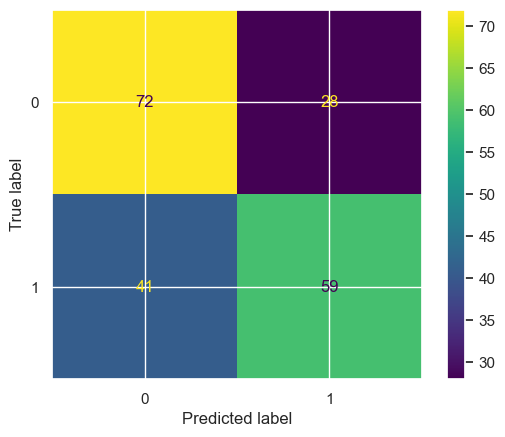

In [93]:
scaler = StandardScaler()
X_train_under_scaled = scaler.fit_transform(X_train_under)
X_test_scaled = scaler.transform(X_test)

dt = DecisionTreeClassifier(criterion='entropy',max_depth=7,min_samples_leaf=10,min_samples_split=2,random_state=42)
dt.fit(X_train_under,y_train_under)

print('Score on train',dt.score(X_train_under,y_train_under))
print('Score on test',dt.score(X_test,y_test))

y_pred = dt.predict(X_test)

print(classification_report(y_test,y_pred))
cm = confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

under_sampling_record['DecisionTreeClassifier'] = []
under_sampling_record['DecisionTreeClassifier'].append([dt.score(X_train_under_scaled,y_train_under),dt.score(X_test_scaled,y_test)])

**MinMax Scaler**

Score on train 0.7956204379562044
Score on test 0.655
              precision    recall  f1-score   support

           0       0.64      0.72      0.68       100
           1       0.68      0.59      0.63       100

    accuracy                           0.66       200
   macro avg       0.66      0.66      0.65       200
weighted avg       0.66      0.66      0.65       200



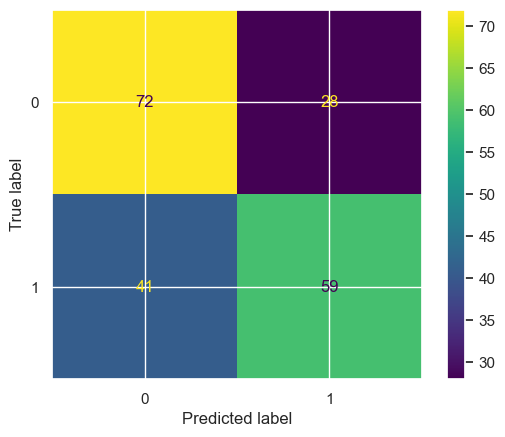

In [94]:
scaler = MinMaxScaler()
X_train_under_scaled = scaler.fit_transform(X_train_under)
X_test_scaled = scaler.transform(X_test)

dt = DecisionTreeClassifier(criterion='entropy',max_depth=7,min_samples_leaf=10,min_samples_split=2,random_state=42)
dt.fit(X_train_under_scaled,y_train_under)

print('Score on train',dt.score(X_train_under_scaled,y_train_under))
print('Score on test',dt.score(X_test_scaled,y_test))

y_pred = dt.predict(X_test_scaled)

print(classification_report(y_test,y_pred))
cm = confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

under_sampling_record['DecisionTreeClassifier'].append([dt.score(X_train_under_scaled,y_train_under),dt.score(X_test_scaled,y_test)])

**Robust Scaler**

Score on train 0.9525547445255474
Score on test 0.59
              precision    recall  f1-score   support

           0       0.59      0.61      0.60       100
           1       0.59      0.57      0.58       100

    accuracy                           0.59       200
   macro avg       0.59      0.59      0.59       200
weighted avg       0.59      0.59      0.59       200



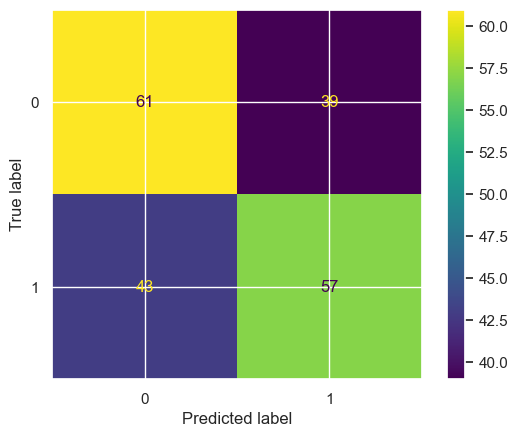

In [95]:
scaler = RobustScaler()
X_train_under_scaled = scaler.fit_transform(X_train_under)
X_test_scaled = scaler.transform(X_test)

dt = DecisionTreeClassifier(criterion='entropy',max_depth=15,min_samples_leaf=2,min_samples_split=5,random_state=42)
dt.fit(X_train_under_scaled,y_train_under)

print('Score on train',dt.score(X_train_under_scaled,y_train_under))
print('Score on test',dt.score(X_test_scaled,y_test))

y_pred = dt.predict(X_test_scaled)

print(classification_report(y_test,y_pred))
cm = confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

under_sampling_record['DecisionTreeClassifier'].append([dt.score(X_train_under_scaled,y_train_under),dt.score(X_test_scaled,y_test)])

### Random Forest

In [96]:
param_grid = {'model__n_estimators':[100,200,300,400],'model__criterion':['gini','entropy'],'model__max_depth':[10,15,20,30],
              'model__min_samples_split':[2,5,7,10],'model__min_samples_leaf':[1,2,5,7,10],'model__max_features':['sqrt','log2']}
result = grid_search(RandomForestClassifier(random_state=42),param_grid,X_train_under,y_train_under)
result

{StandardScaler(): {'model__n_estimators': 400,
  'model__min_samples_split': 7,
  'model__min_samples_leaf': 7,
  'model__max_features': 'log2',
  'model__max_depth': 15,
  'model__criterion': 'entropy'},
 MinMaxScaler(): {'model__n_estimators': 300,
  'model__min_samples_split': 7,
  'model__min_samples_leaf': 10,
  'model__max_features': 'log2',
  'model__max_depth': 15,
  'model__criterion': 'gini'},
 RobustScaler(): {'model__n_estimators': 400,
  'model__min_samples_split': 2,
  'model__min_samples_leaf': 7,
  'model__max_features': 'log2',
  'model__max_depth': 15,
  'model__criterion': 'gini'}}

**Standard Scaler**

Score on train 0.8832116788321168
Score on test 0.72
              precision    recall  f1-score   support

           0       0.72      0.72      0.72       100
           1       0.72      0.72      0.72       100

    accuracy                           0.72       200
   macro avg       0.72      0.72      0.72       200
weighted avg       0.72      0.72      0.72       200



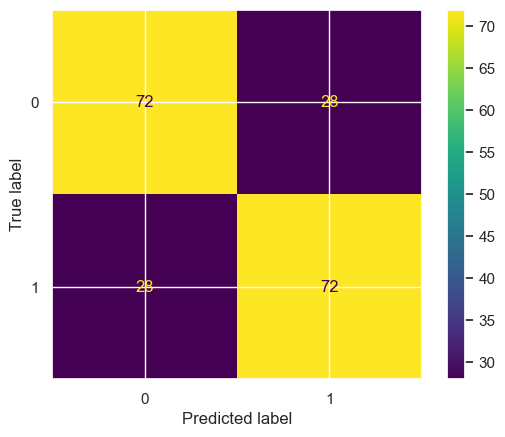

In [98]:
scaler = StandardScaler()
X_train_under_scaled = scaler.fit_transform(X_train_under)
X_test_scaled = scaler.transform(X_test)

rf = RandomForestClassifier(n_estimators=400,min_samples_split=7,min_samples_leaf=7,max_features='log2',max_depth=15,criterion='entropy',random_state=42)
rf.fit(X_train_under_scaled,y_train_under)

print('Score on train',rf.score(X_train_under_scaled,y_train_under))
print('Score on test',rf.score(X_test_scaled,y_test))

y_pred = rf.predict(X_test_scaled)

print(classification_report(y_test,y_pred))

cm = confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

under_sampling_record['RandomForestClassifier'] = []
under_sampling_record['RandomForestClassifier'].append([rf.score(X_train_under_scaled,y_train_under),rf.score(X_test_scaled,y_test)])

**MinMax Scaler**

Score on train 0.843065693430657
Score on test 0.72
              precision    recall  f1-score   support

           0       0.72      0.71      0.72       100
           1       0.72      0.73      0.72       100

    accuracy                           0.72       200
   macro avg       0.72      0.72      0.72       200
weighted avg       0.72      0.72      0.72       200



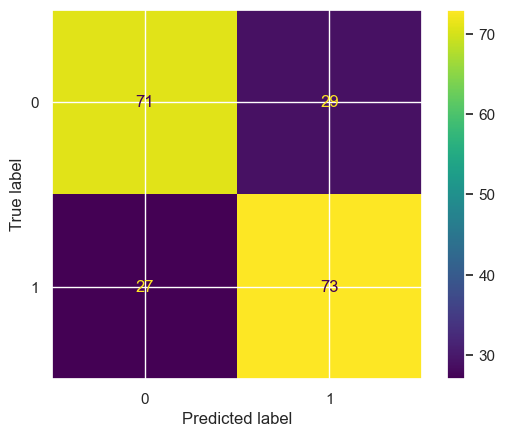

In [100]:
scaler = MinMaxScaler()
X_train_under_scaled = scaler.fit_transform(X_train_under)
X_test_scaled = scaler.transform(X_test)

rf = RandomForestClassifier(n_estimators=300,min_samples_split=7,min_samples_leaf=10,max_features='log2',max_depth=15,criterion='gini',random_state=42)
rf.fit(X_train_under_scaled,y_train_under)

print('Score on train',rf.score(X_train_under_scaled,y_train_under))
print('Score on test',rf.score(X_test_scaled,y_test))

y_pred = rf.predict(X_test_scaled)

print(classification_report(y_test,y_pred))

cm = confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

under_sampling_record['RandomForestClassifier'].append([rf.score(X_train_under_scaled,y_train_under),rf.score(X_test_scaled,y_test)])

**Robust Scaler**

Score on train 0.8795620437956204
Score on test 0.735
              precision    recall  f1-score   support

           0       0.73      0.74      0.74       100
           1       0.74      0.73      0.73       100

    accuracy                           0.73       200
   macro avg       0.74      0.73      0.73       200
weighted avg       0.74      0.73      0.73       200



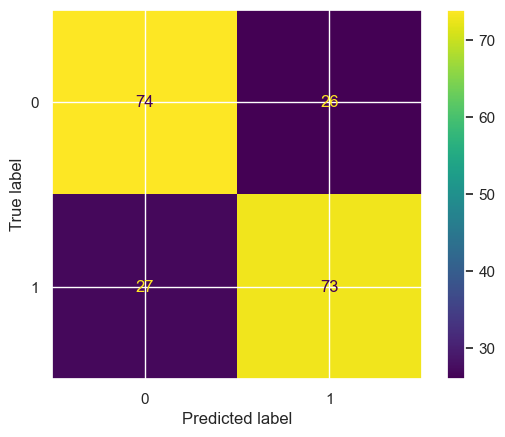

In [101]:
scaler = RobustScaler()
X_train_under_scaled = scaler.fit_transform(X_train_under)
X_test_scaled = scaler.transform(X_test)

rf = RandomForestClassifier(n_estimators=400,min_samples_split=2,min_samples_leaf=7,max_features='log2',max_depth=15,criterion='gini',random_state=42)
rf.fit(X_train_under_scaled,y_train_under)

print('Score on train',rf.score(X_train_under_scaled,y_train_under))
print('Score on test',rf.score(X_test_scaled,y_test))

y_pred = rf.predict(X_test_scaled)

print(classification_report(y_test,y_pred))

cm = confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

under_sampling_record['RandomForestClassifier'].append([rf.score(X_train_under_scaled,y_train_under),rf.score(X_test_scaled,y_test)])

## Over Sampling

### Logistic Regression

#### Not customized

In [102]:
param_grid = {'model__C':[0.1,0.15,0.2],'model__max_iter':[40,60,80,100]}
result = grid_search(LogisticRegression(random_state=42),param_grid,X_train_over,y_train_over)
result

{StandardScaler(): {'model__C': 0.2, 'model__max_iter': 40},
 MinMaxScaler(): {'model__C': 0.15, 'model__max_iter': 40},
 RobustScaler(): {'model__C': 0.2, 'model__max_iter': 40}}

**Standard Scaler**

Score on train 0.9324801412180053
Score on test 0.665
              precision    recall  f1-score   support

           0       0.61      0.93      0.74       100
           1       0.85      0.40      0.54       100

    accuracy                           0.67       200
   macro avg       0.73      0.67      0.64       200
weighted avg       0.73      0.67      0.64       200



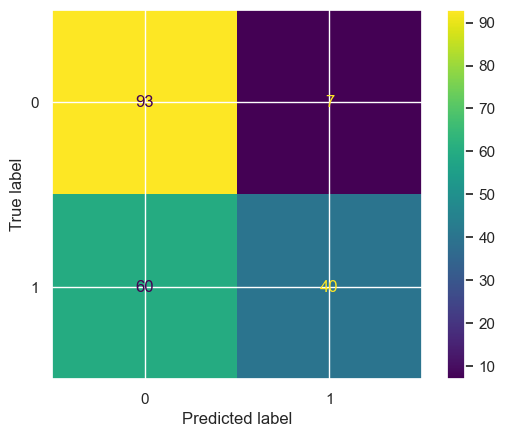

In [103]:
scaler = StandardScaler()
X_train_over_scaled = scaler.fit_transform(X_train_over)
X_test_scaled = scaler.transform(X_test)

log_reg = LogisticRegression(max_iter=40,C=0.2,random_state=42)
log_reg.fit(X_train_over_scaled,y_train_over)

print('Score on train',log_reg.score(X_train_over_scaled,y_train_over))
print('Score on test',log_reg.score(X_test_scaled,y_test))

y_pred = log_reg.predict(X_test_scaled)

print(classification_report(y_test,y_pred))
cm = confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

over_sampling_record['LogisticRegression'] = []
over_sampling_record['LogisticRegression'].append([log_reg.score(X_train_over_scaled,y_train_over),log_reg.score(X_test_scaled,y_test)])

**MinMax Scaler**

Score on train 0.9245366284201235
Score on test 0.635
              precision    recall  f1-score   support

           0       0.58      0.94      0.72       100
           1       0.85      0.33      0.47       100

    accuracy                           0.64       200
   macro avg       0.72      0.64      0.60       200
weighted avg       0.72      0.64      0.60       200



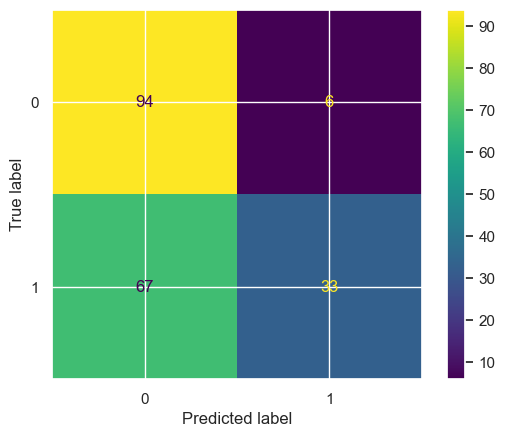

In [104]:
scaler = MinMaxScaler()
X_train_over_scaled = scaler.fit_transform(X_train_over)
X_test_scaled = scaler.transform(X_test)

log_reg = LogisticRegression(max_iter=40,C=0.15,random_state=42)
log_reg.fit(X_train_over_scaled,y_train_over)

print('Score on train',log_reg.score(X_train_over_scaled,y_train_over))
print('Score on test',log_reg.score(X_test_scaled,y_test))

y_pred = log_reg.predict(X_test_scaled)

print(classification_report(y_test,y_pred))
cm = confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

over_sampling_record['LogisticRegression'].append([log_reg.score(X_train_over_scaled,y_train_over),log_reg.score(X_test_scaled,y_test)])

**Robust Scaler**

Score on train 0.9240953221535746
Score on test 0.69
              precision    recall  f1-score   support

           0       0.63      0.93      0.75       100
           1       0.87      0.45      0.59       100

    accuracy                           0.69       200
   macro avg       0.75      0.69      0.67       200
weighted avg       0.75      0.69      0.67       200



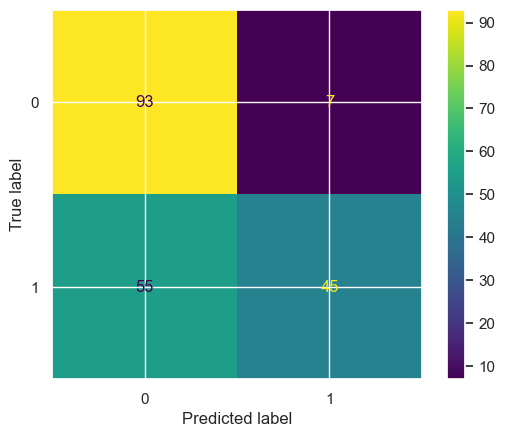

In [105]:
scaler = RobustScaler()
X_train_over_scaled = scaler.fit_transform(X_train_over)
X_test_scaled = scaler.transform(X_test)

log_reg = LogisticRegression(max_iter=40,C=0.2,random_state=42)
log_reg.fit(X_train_over_scaled,y_train_over)

print('Score on train',log_reg.score(X_train_over_scaled,y_train_over))
print('Score on test',log_reg.score(X_test_scaled,y_test))

y_pred = log_reg.predict(X_test_scaled)

print(classification_report(y_test,y_pred))
cm = confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

over_sampling_record['LogisticRegression'].append([log_reg.score(X_train_over_scaled,y_train_over),log_reg.score(X_test_scaled,y_test)])

#### Customized

Score on train 0.9201235657546337
              precision    recall  f1-score   support

           0       0.73      0.72      0.73       100
           1       0.73      0.74      0.73       100

    accuracy                           0.73       200
   macro avg       0.73      0.73      0.73       200
weighted avg       0.73      0.73      0.73       200



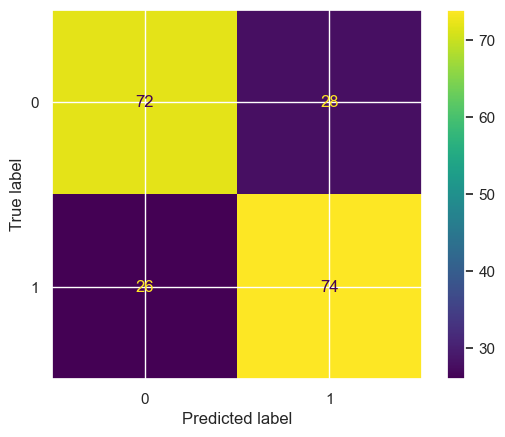

In [106]:
scaler = RobustScaler()
X_train_over_scaled = scaler.fit_transform(X_train_over)
X_test_scaled = scaler.transform(X_test)

log_reg = LogisticRegression(max_iter=100,C=0.15,random_state=42)
log_reg.fit(X_train_over_scaled,y_train_over)

print('Score on train',log_reg.score(X_train_over_scaled,y_train_over))

x = log_reg.decision_function(X_test_scaled) > -1.2
print(classification_report(y_test,x))
cm = confusion_matrix(y_test,x)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

### KNN

In [107]:
param_grid = {'model__n_neighbors':[3,5,10,30,60,80],'model__p':[1,2,3]}
result = grid_search(KNeighborsClassifier(),param_grid,X_train_over,y_train_over)
result

{StandardScaler(): {'model__n_neighbors': 3, 'model__p': 1},
 MinMaxScaler(): {'model__n_neighbors': 3, 'model__p': 1},
 RobustScaler(): {'model__n_neighbors': 3, 'model__p': 1}}

**Standard Scaler**

Score on train 0.9677846425419241
Score on test 0.605
              precision    recall  f1-score   support

           0       0.57      0.89      0.69       100
           1       0.74      0.32      0.45       100

    accuracy                           0.60       200
   macro avg       0.66      0.60      0.57       200
weighted avg       0.66      0.60      0.57       200



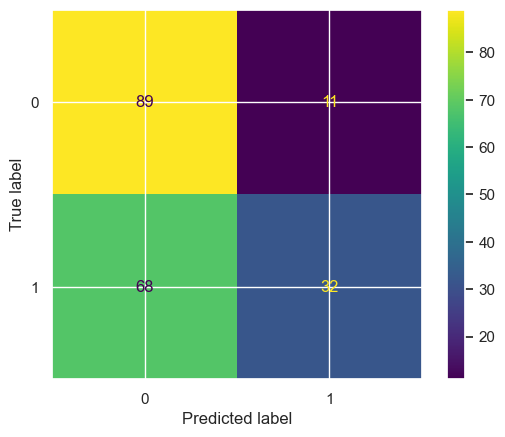

In [108]:
scaler = StandardScaler()
X_train_over_scaled = scaler.fit_transform(X_train_over)
X_test_scaled = scaler.transform(X_test)

knn = KNeighborsClassifier(n_neighbors=3,p=1)
knn.fit(X_train_over_scaled,y_train_over)

print('Score on train',knn.score(X_train_over_scaled,y_train_over))
print('Score on test',knn.score(X_test_scaled,y_test))

y_pred = knn.predict(X_test_scaled)

print(classification_report(y_test,y_pred))
cm = confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

over_sampling_record['KNeighborsClassifier'] = []
over_sampling_record['KNeighborsClassifier'].append([knn.score(X_train_over_scaled,y_train_over),knn.score(X_test_scaled,y_test)])

**MinMax Scaler**

Score on train 0.970432480141218
Score on test 0.59
              precision    recall  f1-score   support

           0       0.56      0.90      0.69       100
           1       0.74      0.28      0.41       100

    accuracy                           0.59       200
   macro avg       0.65      0.59      0.55       200
weighted avg       0.65      0.59      0.55       200



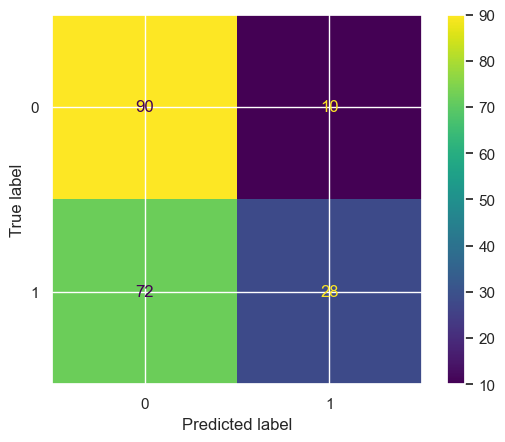

In [109]:
scaler = MinMaxScaler()
X_train_over_scaled = scaler.fit_transform(X_train_over)
X_test_scaled = scaler.transform(X_test)

knn = KNeighborsClassifier(n_neighbors=3,p=1)
knn.fit(X_train_over_scaled,y_train_over)

print('Score on train',knn.score(X_train_over_scaled,y_train_over))
print('Score on test',knn.score(X_test_scaled,y_test))

y_pred = knn.predict(X_test_scaled)

print(classification_report(y_test,y_pred))
cm = confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

over_sampling_record['KNeighborsClassifier'].append([knn.score(X_train_over_scaled,y_train_over),knn.score(X_test_scaled,y_test)])

**Robust Scaler**

Score on train 0.9466019417475728
Score on test 0.6
              precision    recall  f1-score   support

           0       0.58      0.72      0.64       100
           1       0.63      0.48      0.55       100

    accuracy                           0.60       200
   macro avg       0.61      0.60      0.59       200
weighted avg       0.61      0.60      0.59       200



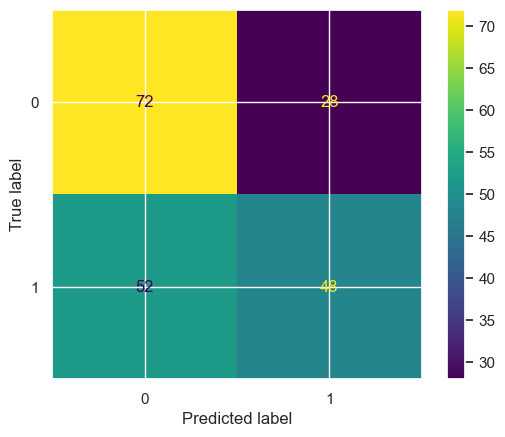

In [110]:
scaler = RobustScaler()
X_train_over_scaled = scaler.fit_transform(X_train_over)
X_test_scaled = scaler.transform(X_test)

knn = KNeighborsClassifier(n_neighbors=3,p=1)
knn.fit(X_train_over_scaled,y_train_over)

print('Score on train',knn.score(X_train_over_scaled,y_train_over))
print('Score on test',knn.score(X_test_scaled,y_test))

y_pred = knn.predict(X_test_scaled)

print(classification_report(y_test,y_pred))
cm = confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

over_sampling_record['KNeighborsClassifier'].append([knn.score(X_train_over_scaled,y_train_over),knn.score(X_test_scaled,y_test)])

### SVC

#### Not customized

In [111]:
param_grid = {'model__C':[0.05,0.1,0.15,0.2,1,5],'model__kernel':['linear','poly','rbf'],'model__degree':[2,3,4],'model__gamma':['scale','auto']}
result = grid_search(SVC(random_state=42),param_grid,X_train_over,y_train_over,go=1)
result

{StandardScaler(): {'model__kernel': 'rbf',
  'model__gamma': 'scale',
  'model__degree': 3,
  'model__C': 1},
 MinMaxScaler(): {'model__kernel': 'poly',
  'model__gamma': 'scale',
  'model__degree': 2,
  'model__C': 0.1},
 RobustScaler(): {'model__kernel': 'poly',
  'model__gamma': 'scale',
  'model__degree': 3,
  'model__C': 5}}

**Standard Scaler**

Score on train 0.96954986760812
Score on test 0.565
              precision    recall  f1-score   support

           0       0.54      0.96      0.69       100
           1       0.81      0.17      0.28       100

    accuracy                           0.56       200
   macro avg       0.67      0.56      0.48       200
weighted avg       0.67      0.56      0.48       200



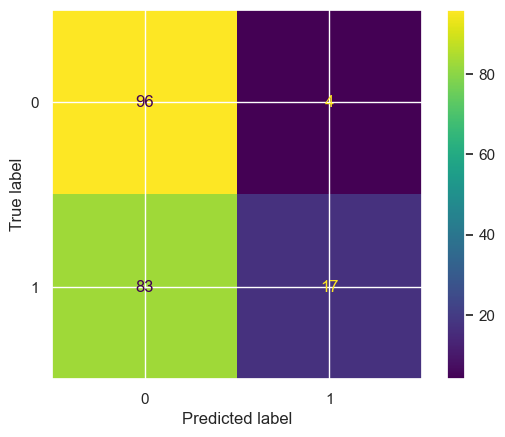

In [112]:
scaler = StandardScaler()
X_train_over_scaled = scaler.fit_transform(X_train_over)
X_test_scaled = scaler.transform(X_test)

svc = SVC(C=1,degree=3,gamma='scale',kernel='rbf',random_state=42)
svc.fit(X_train_over_scaled,y_train_over)

print('Score on train',svc.score(X_train_over_scaled,y_train_over))
print('Score on test',svc.score(X_test_scaled,y_test))

y_pred = svc.predict(X_test_scaled)

print(classification_report(y_test,y_pred))
cm = confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

over_sampling_record['SVC'] = []
over_sampling_record['SVC'].append([svc.score(X_train_over_scaled,y_train_over),svc.score(X_test_scaled,y_test)])

**MinMax Scaler**

Score on train 0.9382171226831421
Score on test 0.63
              precision    recall  f1-score   support

           0       0.58      0.97      0.72       100
           1       0.91      0.29      0.44       100

    accuracy                           0.63       200
   macro avg       0.74      0.63      0.58       200
weighted avg       0.74      0.63      0.58       200



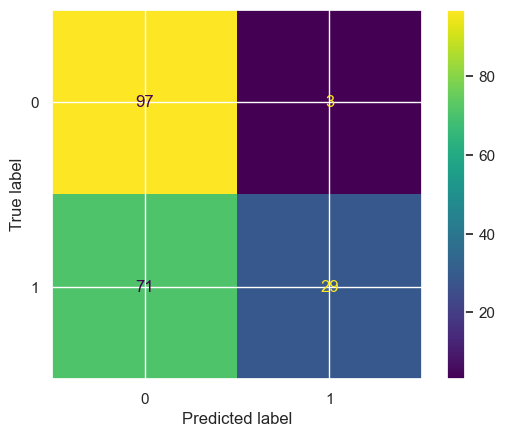

In [113]:
scaler = MinMaxScaler()
X_train_over_scaled = scaler.fit_transform(X_train_over)
X_test_scaled = scaler.transform(X_test)

svc = SVC(C=0.1,degree=2,gamma='scale',kernel='poly',random_state=42)
svc.fit(X_train_over_scaled,y_train_over)

print('Score on train',svc.score(X_train_over_scaled,y_train_over))
print('Score on test',svc.score(X_test_scaled,y_test))

y_pred = svc.predict(X_test_scaled)

print(classification_report(y_test,y_pred))
cm = confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

over_sampling_record['SVC'].append([svc.score(X_train_over_scaled,y_train_over),svc.score(X_test_scaled,y_test)])

**Robust Scaler**

Score on train 0.999117387466902
Score on test 0.615
              precision    recall  f1-score   support

           0       0.57      0.89      0.70       100
           1       0.76      0.34      0.47       100

    accuracy                           0.61       200
   macro avg       0.66      0.61      0.58       200
weighted avg       0.66      0.61      0.58       200



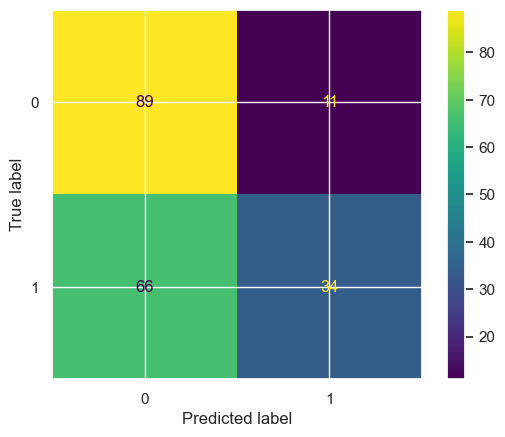

In [114]:
scaler = RobustScaler()
X_train_over_scaled = scaler.fit_transform(X_train_over)
X_test_scaled = scaler.transform(X_test)

svc = SVC(C=5,degree=3,gamma='scale',kernel='poly',random_state=42)
svc.fit(X_train_over_scaled,y_train_over)

print('Score on train',svc.score(X_train_over_scaled,y_train_over))
print('Score on test',svc.score(X_test_scaled,y_test))

y_pred = svc.predict(X_test_scaled)

print(classification_report(y_test,y_pred))
cm = confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

over_sampling_record['SVC'].append([svc.score(X_train_over_scaled,y_train_over),svc.score(X_test_scaled,y_test)])

#### Customized

Score on train 0.9329214474845543
              precision    recall  f1-score   support

           0       0.72      0.69      0.70       100
           1       0.70      0.73      0.72       100

    accuracy                           0.71       200
   macro avg       0.71      0.71      0.71       200
weighted avg       0.71      0.71      0.71       200

[[69 31]
 [27 73]]


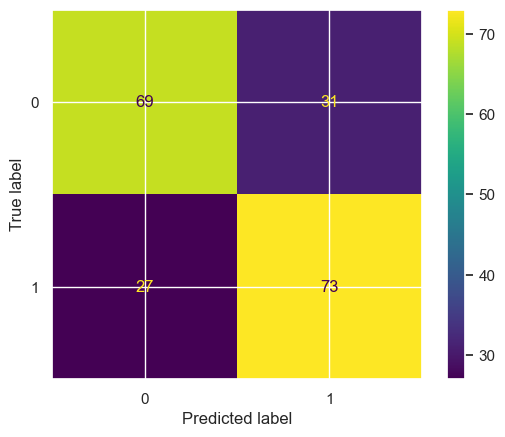

In [115]:
scaler = RobustScaler()
X_train_over_scaled = scaler.fit_transform(X_train_over)
X_test_scaled = scaler.transform(X_test)

svc = SVC(C=0.09,kernel='linear',random_state=42)
svc.fit(X_train_over_scaled,y_train_over)

print('Score on train',svc.score(X_train_over_scaled,y_train_over))

x = svc.decision_function(X_test_scaled) > -0.9
print(classification_report(y_test,x))
cm = confusion_matrix(y_test,x)
print(confusion_matrix(y_test,x))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

### Naive

**Standard Scaler**

Score on train 0.764342453662842
Score on test 0.585
              precision    recall  f1-score   support

           0       0.58      0.65      0.61       100
           1       0.60      0.52      0.56       100

    accuracy                           0.58       200
   macro avg       0.59      0.58      0.58       200
weighted avg       0.59      0.58      0.58       200



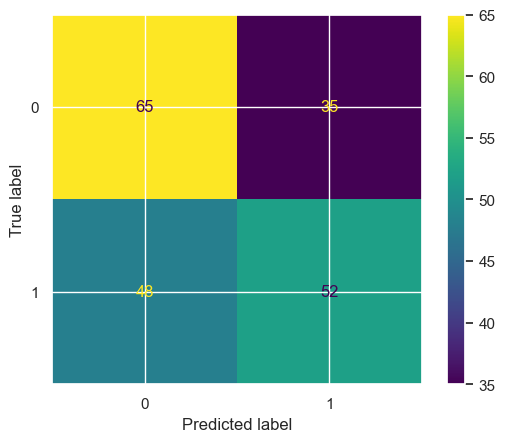

In [116]:
scaler = StandardScaler()
X_train_over_scaled = scaler.fit_transform(X_train_over)
X_test_scaled = scaler.transform(X_test)

nb = GaussianNB()
nb.fit(X_train_over_scaled,y_train_over)

print('Score on train',nb.score(X_train_over_scaled,y_train_over))
print('Score on test',nb.score(X_test_scaled,y_test))

y_pred = nb.predict(X_test_scaled)
print(classification_report(y_test,y_pred))

cm = confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

over_sampling_record['GaussianNB'] = []
over_sampling_record['GaussianNB'].append([nb.score(X_train_over_scaled,y_train_over),nb.score(X_test_scaled,y_test)])

**MinMax Scaler**

Score on train 0.764342453662842
Score on test 0.585
              precision    recall  f1-score   support

           0       0.58      0.65      0.61       100
           1       0.60      0.52      0.56       100

    accuracy                           0.58       200
   macro avg       0.59      0.58      0.58       200
weighted avg       0.59      0.58      0.58       200



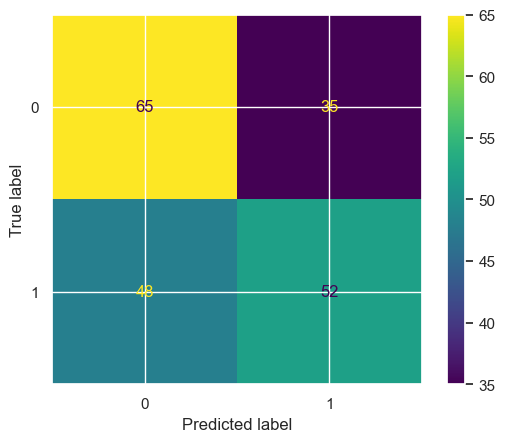

In [117]:
scaler = MinMaxScaler()
X_train_over_scaled = scaler.fit_transform(X_train_over)
X_test_scaled = scaler.transform(X_test)

nb = GaussianNB()
nb.fit(X_train_over_scaled,y_train_over)

print('Score on train',nb.score(X_train_over_scaled,y_train_over))
print('Score on test',nb.score(X_test_scaled,y_test))

y_pred = nb.predict(X_test_scaled)
print(classification_report(y_test,y_pred))

cm = confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

over_sampling_record['GaussianNB'].append([nb.score(X_train_over_scaled,y_train_over),nb.score(X_test_scaled,y_test)])

**Robust Scaler**

Score on train 0.764342453662842
Score on test 0.585
              precision    recall  f1-score   support

           0       0.58      0.65      0.61       100
           1       0.60      0.52      0.56       100

    accuracy                           0.58       200
   macro avg       0.59      0.58      0.58       200
weighted avg       0.59      0.58      0.58       200



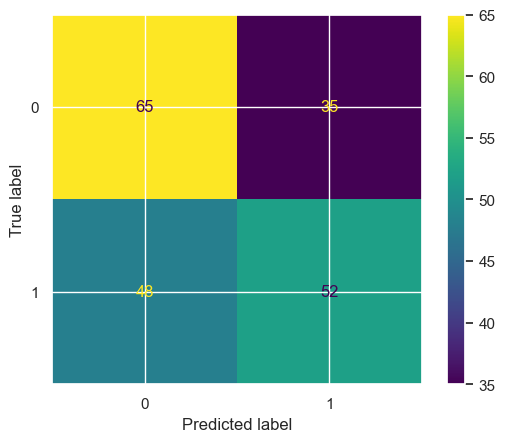

In [118]:
scaler = RobustScaler()
X_train_over_scaled = scaler.fit_transform(X_train_over)
X_test_scaled = scaler.transform(X_test)

nb = GaussianNB()
nb.fit(X_train_over_scaled,y_train_over)

print('Score on train',nb.score(X_train_over_scaled,y_train_over))
print('Score on test',nb.score(X_test_scaled,y_test))

y_pred = nb.predict(X_test_scaled)
print(classification_report(y_test,y_pred))

cm = confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

over_sampling_record['GaussianNB'].append([nb.score(X_train_over_scaled,y_train_over),nb.score(X_test_scaled,y_test)])

### Decision Tree

In [119]:
param_grid = {'model__criterion':['gini','entropy','log_loss'],'model__max_depth':[7,10,15,20,30],
              'model__min_samples_split':[2,5,7,10],'model__min_samples_leaf':[1,2,5,7,10]}
result = grid_search(DecisionTreeClassifier(random_state=42),param_grid,X_train_over,y_train_over,go=1)
result

{StandardScaler(): {'model__min_samples_split': 5,
  'model__min_samples_leaf': 7,
  'model__max_depth': 20,
  'model__criterion': 'gini'},
 MinMaxScaler(): {'model__min_samples_split': 2,
  'model__min_samples_leaf': 2,
  'model__max_depth': 15,
  'model__criterion': 'gini'},
 RobustScaler(): {'model__min_samples_split': 5,
  'model__min_samples_leaf': 2,
  'model__max_depth': 15,
  'model__criterion': 'gini'}}

**Standard Scaler**

Score on train 0.942630185348632
Score on test 0.625
              precision    recall  f1-score   support

           0       0.58      0.94      0.71       100
           1       0.84      0.31      0.45       100

    accuracy                           0.62       200
   macro avg       0.71      0.62      0.58       200
weighted avg       0.71      0.62      0.58       200



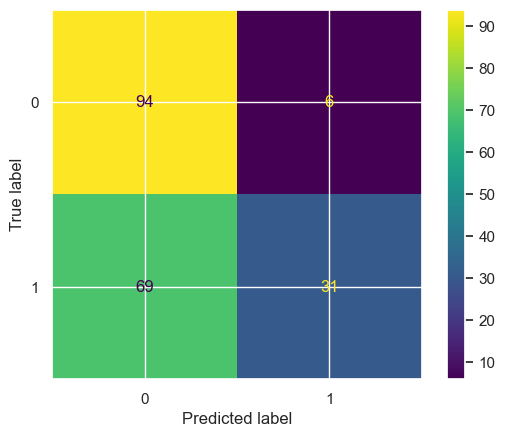

In [120]:
scaler = StandardScaler()
X_train_over_scaled = scaler.fit_transform(X_train_over)
X_test_scaled = scaler.transform(X_test)

dt = DecisionTreeClassifier(criterion='gini',max_depth=20,min_samples_leaf=7,min_samples_split=5,random_state=42)
dt.fit(X_train_over_scaled,y_train_over)

print('Score on train',dt.score(X_train_over_scaled,y_train_over))
print('Score on test',dt.score(X_test_scaled,y_test))

y_pred = dt.predict(X_test_scaled)

print(classification_report(y_test,y_pred))
cm = confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

over_sampling_record['DecisionTreeClassifier'] = []
over_sampling_record['DecisionTreeClassifier'].append([dt.score(X_train_over_scaled,y_train_over),dt.score(X_test_scaled,y_test)])

**MinMax Scaler**

Score on train 0.9827890556045896
Score on test 0.645
              precision    recall  f1-score   support

           0       0.59      0.95      0.73       100
           1       0.87      0.34      0.49       100

    accuracy                           0.65       200
   macro avg       0.73      0.65      0.61       200
weighted avg       0.73      0.65      0.61       200



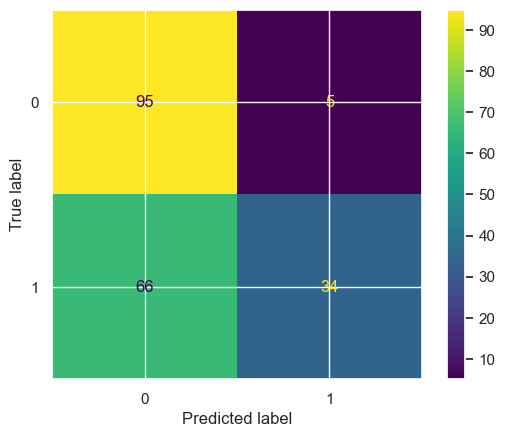

In [121]:
scaler = MinMaxScaler()
X_train_over_scaled = scaler.fit_transform(X_train_over)
X_test_scaled = scaler.transform(X_test)

dt = DecisionTreeClassifier(criterion='gini',max_depth=15,min_samples_leaf=2,min_samples_split=2,random_state=42)
dt.fit(X_train_over_scaled,y_train_over)

print('Score on train',dt.score(X_train_over_scaled,y_train_over))
print('Score on test',dt.score(X_test_scaled,y_test))

y_pred = dt.predict(X_test_scaled)

print(classification_report(y_test,y_pred))
cm = confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

over_sampling_record['DecisionTreeClassifier'].append([dt.score(X_train_over_scaled,y_train_over),dt.score(X_test_scaled,y_test)])

**Robust Scaler**

Score on train 0.9783759929390997
Score on test 0.65
              precision    recall  f1-score   support

           0       0.59      0.95      0.73       100
           1       0.88      0.35      0.50       100

    accuracy                           0.65       200
   macro avg       0.73      0.65      0.62       200
weighted avg       0.73      0.65      0.62       200



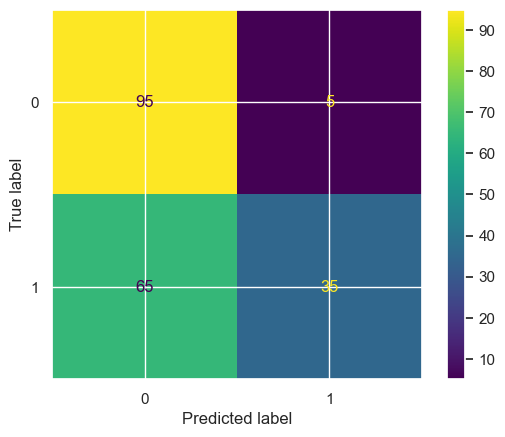

In [122]:
scaler = RobustScaler()
X_train_over_scaled = scaler.fit_transform(X_train_over)
X_test_scaled = scaler.transform(X_test)

dt = DecisionTreeClassifier(criterion='gini',max_depth=15,min_samples_leaf=2,min_samples_split=5,random_state=42)
dt.fit(X_train_over_scaled,y_train_over)

print('Score on train',dt.score(X_train_over_scaled,y_train_over))
print('Score on test',dt.score(X_test_scaled,y_test))

y_pred = dt.predict(X_test_scaled)

print(classification_report(y_test,y_pred))
cm = confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

over_sampling_record['DecisionTreeClassifier'].append([dt.score(X_train_over_scaled,y_train_over),dt.score(X_test_scaled,y_test)])

### Random Forest

In [123]:
param_grid = {'model__n_estimators':[100,200,300,400],'model__criterion':['gini','entropy'],'model__max_depth':[10,15,20,30],
              'model__min_samples_split':[2,5,7,10],'model__min_samples_leaf':[1,2,5,7,10],'model__max_features':['sqrt','log2']}
result = grid_search(RandomForestClassifier(random_state=42),param_grid,X_train_under,y_train_under)
result

{StandardScaler(): {'model__n_estimators': 400,
  'model__min_samples_split': 10,
  'model__min_samples_leaf': 10,
  'model__max_features': 'log2',
  'model__max_depth': 20,
  'model__criterion': 'entropy'},
 MinMaxScaler(): {'model__n_estimators': 300,
  'model__min_samples_split': 10,
  'model__min_samples_leaf': 10,
  'model__max_features': 'sqrt',
  'model__max_depth': 30,
  'model__criterion': 'gini'},
 RobustScaler(): {'model__n_estimators': 400,
  'model__min_samples_split': 2,
  'model__min_samples_leaf': 10,
  'model__max_features': 'log2',
  'model__max_depth': 15,
  'model__criterion': 'gini'}}

**Standard Scaler**

Score on train 0.9567519858781994
Score on test 0.615
              precision    recall  f1-score   support

           0       0.57      0.96      0.71       100
           1       0.87      0.27      0.41       100

    accuracy                           0.61       200
   macro avg       0.72      0.61      0.56       200
weighted avg       0.72      0.61      0.56       200



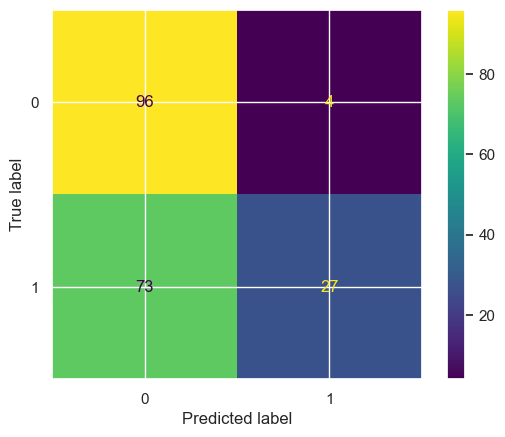

In [124]:
scaler = StandardScaler()
X_train_over_scaled = scaler.fit_transform(X_train_over)
X_test_scaled = scaler.transform(X_test)

rf = RandomForestClassifier(n_estimators=400,min_samples_split=10,min_samples_leaf=10,max_features='log2',max_depth=20,criterion='entropy',random_state=42)
rf.fit(X_train_over_scaled,y_train_over)

print('Score on train',rf.score(X_train_over_scaled,y_train_over))
print('Score on test',rf.score(X_test_scaled,y_test))

y_pred = rf.predict(X_test_scaled)

print(classification_report(y_test,y_pred))

cm = confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

over_sampling_record['RandomForestClassifier'] = []
over_sampling_record['RandomForestClassifier'].append([rf.score(X_train_over_scaled,y_train_over),rf.score(X_test_scaled,y_test)])

**MinMax Scaler**

Score on train 0.9563106796116505
Score on test 0.61
              precision    recall  f1-score   support

           0       0.56      0.96      0.71       100
           1       0.87      0.26      0.40       100

    accuracy                           0.61       200
   macro avg       0.72      0.61      0.56       200
weighted avg       0.72      0.61      0.56       200



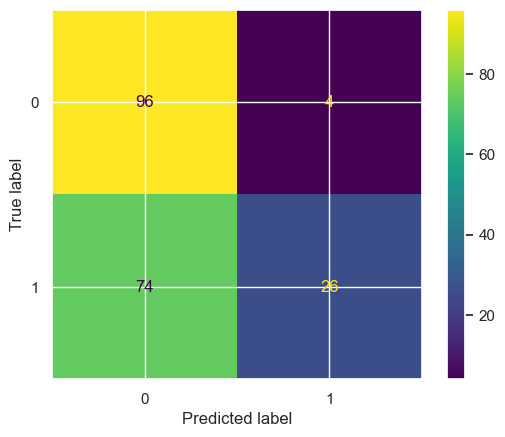

In [125]:
scaler = MinMaxScaler()
X_train_over_scaled = scaler.fit_transform(X_train_over)
X_test_scaled = scaler.transform(X_test)

rf = RandomForestClassifier(n_estimators=300,min_samples_split=10,min_samples_leaf=10,max_features='sqrt',max_depth=30,criterion='gini',random_state=42)
rf.fit(X_train_over_scaled,y_train_over)

print('Score on train',rf.score(X_train_over_scaled,y_train_over))
print('Score on test',rf.score(X_test_scaled,y_test))

y_pred = rf.predict(X_test_scaled)

print(classification_report(y_test,y_pred))

cm = confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

over_sampling_record['RandomForestClassifier'].append([rf.score(X_train_over_scaled,y_train_over),rf.score(X_test_scaled,y_test)])

**Robust Scaler**

Score on train 0.9563106796116505
Score on test 0.61
              precision    recall  f1-score   support

           0       0.56      0.96      0.71       100
           1       0.87      0.26      0.40       100

    accuracy                           0.61       200
   macro avg       0.72      0.61      0.56       200
weighted avg       0.72      0.61      0.56       200



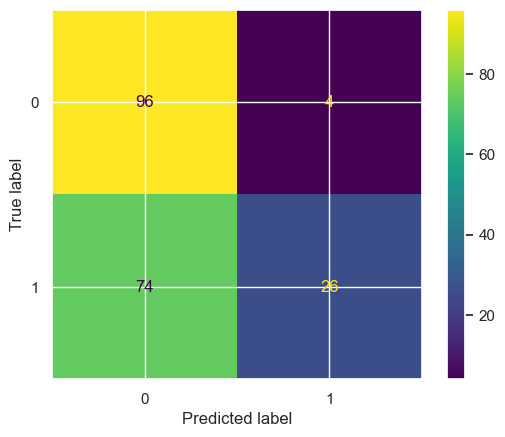

In [126]:
scaler = RobustScaler()
X_train_over_scaled = scaler.fit_transform(X_train_over)
X_test_scaled = scaler.transform(X_test)

rf = RandomForestClassifier(n_estimators=400,min_samples_split=2,min_samples_leaf=10,max_features='log2',max_depth=15,criterion='gini',random_state=42)
rf.fit(X_train_over_scaled,y_train_over)

print('Score on train',rf.score(X_train_over_scaled,y_train_over))
print('Score on test',rf.score(X_test_scaled,y_test))

y_pred = rf.predict(X_test_scaled)

print(classification_report(y_test,y_pred))

cm = confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

over_sampling_record['RandomForestClassifier'].append([rf.score(X_train_over_scaled,y_train_over),rf.score(X_test_scaled,y_test)])

# Comparison

In [127]:
def prep_plot(record):
       scalers = ['Standard scaler', 'MinMax scaler', 'Robust scaler']
       df = pd.DataFrame(record, index=scalers).reset_index().melt(id_vars='index', var_name='Model', value_name='Scores')
       df[['Train Score', 'Test Score']] = pd.DataFrame(df['Scores'].tolist(), index=df.index)
       df.drop(columns=['Scores'], inplace=True)
       df.rename(columns={'index': 'Scaler'}, inplace=True)
       return df

## Under sampling

In [128]:
under_sampling_record

{'LogisticRegression': [[0.7773722627737226, 0.795],
  [0.7372262773722628, 0.765],
  [0.7554744525547445, 0.785]],
 'KNeighborsClassifier': [[0.6897810218978102, 0.745],
  [0.7116788321167883, 0.71],
  [0.7153284671532847, 0.755]],
 'SVC': [[0.916058394160584, 0.8],
  [0.7992700729927007, 0.75],
  [0.7773722627737226, 0.78]],
 'GaussianNB': [[0.6788321167883211, 0.685],
  [0.6788321167883211, 0.685],
  [0.6788321167883211, 0.685]],
 'DecisionTreeClassifier': [[0.5218978102189781, 0.525],
  [0.7956204379562044, 0.655],
  [0.9525547445255474, 0.59]],
 'RandomForestClassifier': [[0.8832116788321168, 0.72],
  [0.843065693430657, 0.72],
  [0.8795620437956204, 0.735]]}

In [129]:
df = prep_plot(under_sampling_record)
px.bar(df, x='Model', y='Train Score',color='Scaler', barmode='group',labels={'Train Score': 'Accuracy'},
       title='Comparison of Train Scores Across Models and Scalers',color_discrete_sequence=px.colors.sequential.Blues_r)

In [130]:
df = prep_plot(under_sampling_record)
px.bar(df, x='Model', y='Test Score',color='Scaler', barmode='group',labels={'Test Score': 'Accuracy'},
       title='Comparison of Test Scores Across Models and Scalers',color_discrete_sequence=px.colors.sequential.Blues_r)

Low accuracy but reasonable

## Over sampling

In [131]:
over_sampling_record

{'LogisticRegression': [[0.9324801412180053, 0.665],
  [0.9245366284201235, 0.635],
  [0.9240953221535746, 0.69]],
 'KNeighborsClassifier': [[0.9677846425419241, 0.605],
  [0.970432480141218, 0.59],
  [0.9466019417475728, 0.6]],
 'SVC': [[0.96954986760812, 0.565],
  [0.9382171226831421, 0.63],
  [0.999117387466902, 0.615]],
 'GaussianNB': [[0.764342453662842, 0.585],
  [0.764342453662842, 0.585],
  [0.764342453662842, 0.585]],
 'DecisionTreeClassifier': [[0.942630185348632, 0.625],
  [0.9827890556045896, 0.645],
  [0.9783759929390997, 0.65]],
 'RandomForestClassifier': [[0.9567519858781994, 0.615],
  [0.9563106796116505, 0.61],
  [0.9563106796116505, 0.61]]}

In [132]:
df = prep_plot(over_sampling_record)
px.bar(df, x='Model', y='Train Score',color='Scaler', barmode='group',labels={'Train Score': 'Accuracy'},
       title='Comparison of Train Scores Across Models and Scalers',color_discrete_sequence=px.colors.sequential.Blues_r)

In [133]:
df = prep_plot(over_sampling_record)
px.bar(df, x='Model', y='Test Score',color='Scaler', barmode='group',labels={'Test Score': 'Accuracy'},
       title='Comparison of Test Scores Across Models and Scalers',color_discrete_sequence=px.colors.sequential.Blues_r)

But all of it is considered as kind of fake accuracy